# Predicting the Top 20 Properties

**BZAN 6355 - Prof. Xiao Ma**

**Subhrasweta Pattnaik, Nahal Shoukat**

## Groundwork for the Libraries

We import our numpy for linear algebra, pandas for data visualization and analysis, and then various modules from scikitlearn for our choosen models.

In [6]:
import pandas as pd
import numpy as np
from numpy import NaN as NA

import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set(style="ticks")

from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn.neighbors as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
# for imputing missing values
from sklearn.impute import SimpleImputer
# for transformation pipelines
from sklearn.pipeline import Pipeline, make_pipeline
# for custom column transformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
#enable interactive plotting
%matplotlib inline 

In [8]:
np.random.seed(1)

The `np.random.seed(1)` is important to make sure that when we fit our models on the data after partitioning, the result of the models does not change after every run due to the random nature of the partition.

## Phase I: Business Research and Understanding

### Introduction 
In this report, we will use analytical techniques and models to recommend for investment in the purchase of twenty (20) most luxurious homes out of 100 candidate properties for which the sales prices are not known. The data we will use for this project are described below. We will explore the various analytics models and apply them on the dataset of properties present in the North-West region of the US. We will compare the techniques and apply the most appropriate ones to our data to make good decisions. The process will be informed by the exploratory analyses we conduct, any problem-fixing endeavors we apply on the dataset, and the models we develop and tune. Throughout the duration of the project, we will be using the CRISP-DM standard. The Cross-Industry Standard Process for Data Mining (CRISP-DM) was developed by analysts representing Daimler-Chrysler, SPSS, and NCR. For the first phase, namely the Business Research and Understanding Phase, our goal is to clearly stipulate our project objectives and the strategy we will employ to meet these objectives in terms of a data mining problem definition.

### The Data 
For data mining purposes, we are using four (4) raw data files containing information obtained from an anonymous United States city assessor’s office that is in the North West region. The values in the data files are for individual residential real estate properties sold in that city over a time period of 4 years (year of sale not included in the scope of this project). Descriptions of the variables and the different data files are given below. We will also use one (1) Score data set that consists of many of the variables in the raw data files. There are a couple of caveats regarding the Score data set: a few variables that are in the raw data files are not available in the Score data set, the most critical of which is the Sale Price of the houses, along with a few others such as Exterior Quality.

### Background and the Goal 
We are a set of investors who plan to purchase 20 residential properties in the city where the raw data files were collected. The broker of the properties gave us a list of 100 properties and their information as our Score data set, consisting of many assessed values for them. However, this “Score” data set does not contain the final sale prices or a couple of other variables. For some properties, some values of a few variables may be missing. Our goal is to develop models and appropriate procedures to predict and rank the sale price and recommend the 20 most luxurious houses. The reason for investing in the top luxury houses is that their potential investment growth is believed to be the greatest.

## Phase 2: Data Understanding
In this second phase of the CRISP-DM model we are mainly focusing on collecting the data (merging and appending them as necessary), enacting exploratory data analysis to familiarize ourselves with the data and discover initial insights, evaluating the quality of the data and finally, selecting interesting subsets that may contain actionable patterns. We begin this process by detailing the variables we have available in all our data sets.

### Data and Variable Description
1. **PID (Property Identification)** – a unique number to identify each property.
2. **LotArea** – The size of the lot, measured in square feet, on which the house is located. 
3. **LotShape** – The general shape of the lot. A lot with a regular shape has a value of 1, and another with not a regular shape has a value of 0. 
4. **BldgTp (i.e., Building Type)** – This describes the type of home in terms of its footprint. A single-family detached type of home is indicated by a value of 1, and a townhouse type of home is indicated by a value of 0. 
5. **OverallQuality** – This is a rating of the overall material and finish of the house. The numeric scale of this rating is as follows. 


    10 - Very Excellent 
    9 - Excellent 
    8 - Very Good 
    7 -Good 
    6 - Above Average 
    5 - Average 
    4 - Below Average 
    3 - Fair 
    2 - Poor 
    1 - Very Poor 
    
6. **OverallCondition** – This is a rating of the overall condition of the house. The numeric scale of this rating is as follows. 


    10 - Very Excellent 
    9 - Excellent 
    8 - Very Good 
    7 - Good 
    6 - Above Average 
    5 - Average 
    4 - Below Average 
    3 - Fair 
    2 - Poor 
    1 - Very Poor 
    
9. **YearBuilt** – This describes the year when the house was constructed. 
10. **YearRemodel** – This describes the year when the house was remodeled. If the house was never remodeled, then the "year remodel" is the same as the "year built". 
11. **VeneerExterior** – This describes the area in square feet of the exterior wall that is veneer. 
12. **BsmtFinTp (Basement Finished Type)** – This indicates whether a home’s basement is finished or not in the sense that it can be lived in or not. When it is finished, it has a value of 1, and a value of 0 otherwise. 
13. **BsmtFinSqft** – This is the measure of the area of a finished basement. 
14. **BsmtUnfinSqft** – This is the measure of the area of an unfinished basement.    
16. **HeatingQC (Heating Quality Condition)** – This is a measure of the rating of how well the heating unit is for a house. The rating scale is as follows: 


    3 - Excellent 
    2 - Good 
    1 - Average 
    0 - Fair 
    
17. **FstFlrSqft (First floor Sqt ft)** – This is a measure of the living space on the first floor of a house. 
18. **SecFlrSqft (Second floor Sqt ft)** – This is a measure of the living space on the second floor of a house. 
19. **AbvGrndLiving** – This is a measure of the living space of the entire house, excluding the basement. 
20. **FullBathBsmt** - This indicates the number of full bathrooms in the basement of a house. A value of 1 indicates that there is a full bathroom and a value of 0 indicates that there is not a full bathroom in the basement. 
21. **HalfBathHouse** - This indicates whether there is a half bathroom in the house (excluding the basement). A value of 1 indicates that there is a half bathroom and a value of 0 indicates that there is not a half bathroom in the house. 
22. **FullBathHouse** - This indicates the number of full bathrooms there are in the house, not including bathroom in the basement. 
23. **BdrmAbvGrnd** - This indicates the number of bedrooms there are in the house, not including the basement. 
24. **RmAbvGrnd** - This indicates the number of rooms there are in the house, not including the basement. 
25. **Fireplaces** – This indicates the number of fireplaces there are in the house, not including the basement. 
26. **GarageTp** – Whether there is a garage of a given type is described and indicated as follows: 
    
    
    3 - Attached to house 
    2 - Built-In (Garage part of house - typically has room above garage) 
    1 - Detached from home 
    0 - No garage 
    
27. **GarageCars** – This indicates the number of cars that can be accommodated in the garage of the house. 
28. **GarageArea** – This is the size of garage in square feet. 
29. **WdDckSqft** – This is the size of the wood deck area in square feet for a house. 
30. **OpenPrchSqft** - This is the size of the open porch area in square feet for a house. 
31. **SalePrice** – This is the sale price of a house (not included in the Score data set).

    
### Data Files Description
In this section we will be describing the 5 data files that include all of the variables listed previously. As one can expect, there were certain important missing variables in our score data file that we obtained from the other 4 data files and merged into one file for SAS EM as will be described in the Data Management Procedures section. The variables available in the merged file but not in the score data file are: Exterior_Quality, Foundation, Total_Bsmt_Sqr_ft. The target variable is Sale_Price

1. **Property Survey** – 1: Contains 600 rows 
    
    *Variables*: PID (Property Identification), Lot Area, Lot Shape, and Bldg Type 


2. **Property Survey** – 2: Contains 1770 rows 
    
    *Variables*: PID (Property Identification), Lot Area, Lot Shape, and Bldg Type 


3. **Quality Assessment** 

    *Variables*: PID (Property Identification), Overall Quality, Overall Condition


4. **House Feature** 
    
    *Variables*: PID (Property Identification), YearBuilt, YearRemodel, VeneerExterior, BsmtFinTp, BsmtFinSqft, BsmtUnfinSqft, HeatingQC, FstFlrSqft, SecFlrSqft, AbvGrndLiving, FullBathBsmt, HalfBathHouse, FullBathHouse, BdrmAbvGrnd, RmAbvGrnd, Fireplaces, GarageTp, GarageCars, GarageArea, WdDckSqft, OpenPrchSqft, SalePrice 


5. **Score Data**: contains 100 rows, No Sale Price 
    
    *Variables*: PID (Property Identification), LotArea, LotShape, and BldgTp, OverallQuality, OverallCondition, YearBuilt, YearRemodel, VeneerExterior, BsmtFinTp, BsmtFinSqft, BsmtUnfinSqft, HeatingQC, FstFlrSqft, SecFlrSqft, AbvGrndLiving, FullBathBsmt, HalfBathHouse, FullBathHouse, BdrmAbvGrnd, RmAbvGrnd, Fireplaces, GarageTp, GarageCars, GarageArea, WdDckSqft, OpenPrchSqft

### Data Management Procedures

In [9]:
houseFeatures = pd.read_csv('House_Feature.CSV')
propertySurvey1 = pd.read_csv('Property_Survey_1.CSV')
propertySurvey2 = pd.read_csv('Property_Survey_2.CSV')
qualityAssessment = pd.read_csv('Quality_Assessment.CSV')
scoreData = pd.read_csv('Score_Data-No_Sale_Price.CSV')

In [10]:
# Sanity Check
houseFeatures.columns

Index(['PID', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

In [11]:
# Sanity Check
houseFeatures.shape

(2370, 23)

In [12]:
# Sanity Check
propertySurvey1.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')

In [13]:
# Sanity Check
propertySurvey1.shape

(600, 4)

In [14]:
# Sanity Check
propertySurvey2.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')

In [15]:
# Sanity Check
propertySurvey2.shape

(1770, 4)

In [16]:
# Sanity Check
qualityAssessment.columns

Index(['PID', 'OverallQuality', 'OverallCondition'], dtype='object')

In [17]:
# Sanity Check
qualityAssessment.shape

(2370, 3)

In [18]:
# Sanity Check
scoreData.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

In [19]:
# Sanity Check
scoreData.shape

(100, 27)

We noticed that propertySurvey1 and propertySurvey2 have the same column names but different `PID`s, which means that both surveys collected the same information but were performed on different properties. Thus, we will append them.

In [20]:
propertySurvey = propertySurvey1.append(propertySurvey2).reset_index(drop=True)

In [21]:
#sanity check
#pd.set_option("display.max_rows", None, "display.max_columns", None)
propertySurvey.shape
#propertySurvey

(2370, 4)

We will now merge the `propertySurvey` and `houseFeatures` dataframes on the `PID` column.

In [22]:
propertyDataTemp = propertySurvey.merge(houseFeatures, on='PID', how='outer')
propertyDataTemp.shape

(2370, 26)

We will merge this `propertyDataTemp` dataframe with `qualityAssessment`, again, on the `PID` column.

In [23]:
propertyData = propertyDataTemp.merge(qualityAssessment, on='PID', how='outer')
propertyData.shape

(2370, 28)

In [24]:
propertyData.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'YearBuilt', 'YearRemodel',
       'VeneerExterior', 'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft',
       'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse', 'BdrmAbvGrnd',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'GarageArea',
       'WdDckSqft', 'OpenPrchSqft', 'SalePrice', 'OverallQuality',
       'OverallCondition'],
      dtype='object')

Looking at the number of columns in `propertyData`, and as is the property of the `merge()` function, we know that the `PID` column wasn't duplicated in each successive merge. 

### Exploratory Data Analysis (EDA)

We begin this phase by checking if the `propertyData` has any missing values.

In [25]:
propertyData.isna().sum().sum()

0

Thus, there are no missing values in our data. This was an important first step, as missing values in some cases can lead to skewed distributions, creating bias within the results. We then plotted histograms for all the variables to observe the trends and any possibility of skewness in the data.

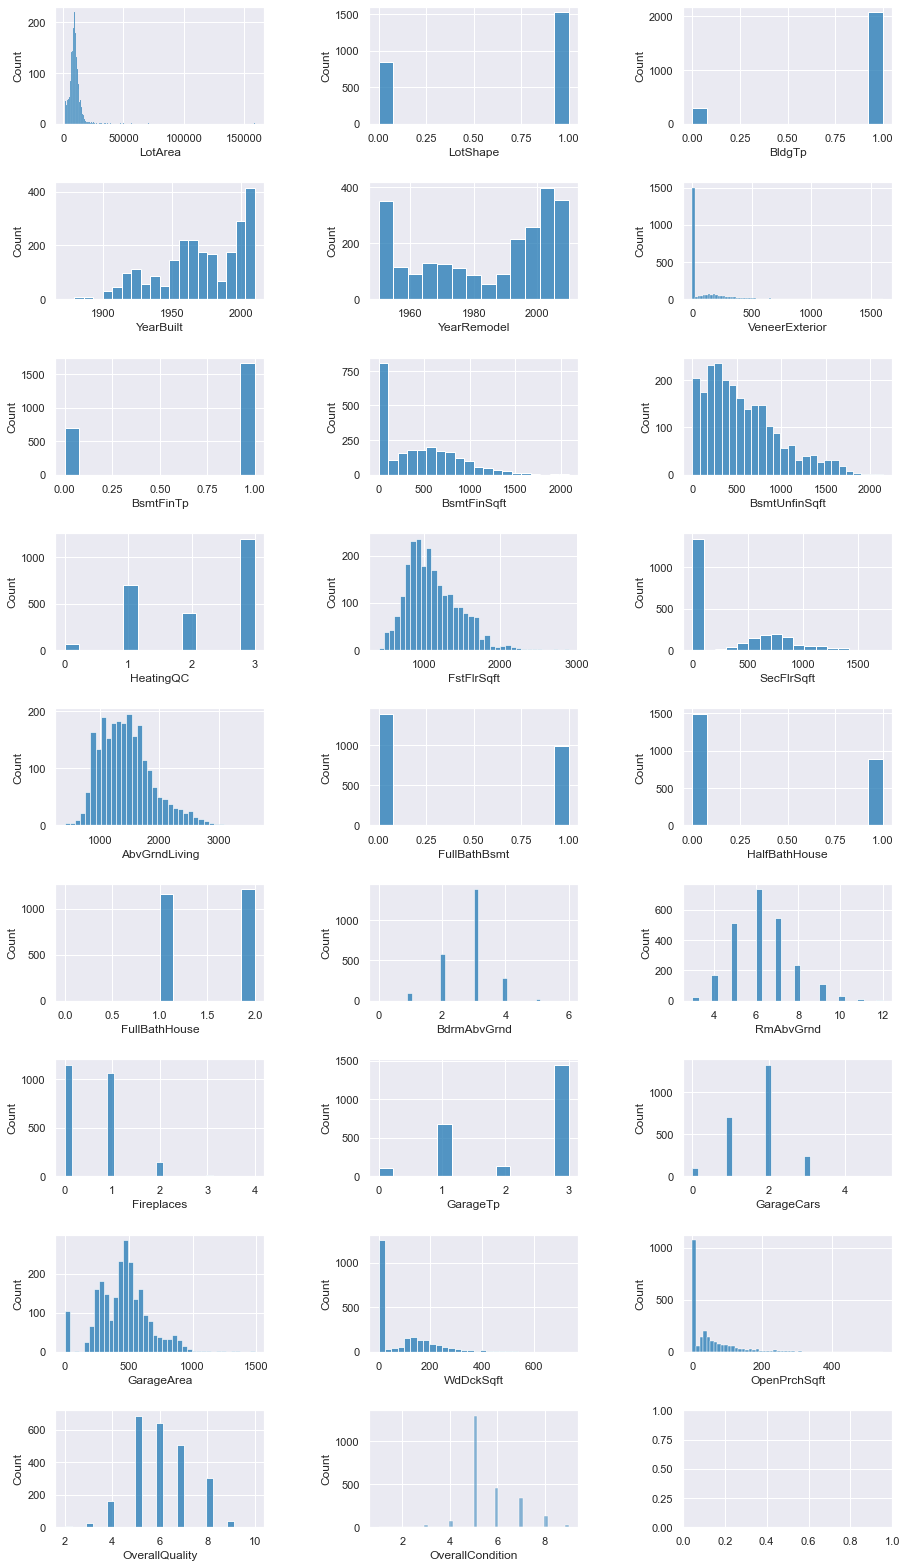

In [26]:
sns.set(style="darkgrid")
#df = sns.load_dataset("propertyData")

fig, axs = plt.subplots(9, 3, figsize=(15, 22))

sns.histplot(data=propertyData, x="LotArea", ax=axs[0, 0], color='tab:blue')
sns.histplot(data=propertyData, x="LotShape", ax=axs[0, 1], color='tab:blue')
sns.histplot(data=propertyData, x="BldgTp", ax=axs[0, 2], color='tab:blue')

sns.histplot(data=propertyData, x="YearBuilt", ax=axs[1, 0], color='tab:blue')
sns.histplot(data=propertyData, x="YearRemodel", ax=axs[1, 1], color='tab:blue')
sns.histplot(data=propertyData, x="VeneerExterior", ax=axs[1, 2], color='tab:blue')

sns.histplot(data=propertyData, x="BsmtFinTp", ax=axs[2, 0], color='tab:blue')
sns.histplot(data=propertyData, x="BsmtFinSqft", ax=axs[2, 1], color='tab:blue')
sns.histplot(data=propertyData, x="BsmtUnfinSqft", ax=axs[2, 2], color='tab:blue')

sns.histplot(data=propertyData, x="HeatingQC", ax=axs[3, 0], color='tab:blue')

sns.histplot(data=propertyData, x="FstFlrSqft", ax=axs[3, 1], color='tab:blue')
sns.histplot(data=propertyData, x="SecFlrSqft", ax=axs[3, 2], color='tab:blue')

sns.histplot(data=propertyData, x="AbvGrndLiving", ax=axs[4, 0], color='tab:blue')

sns.histplot(data=propertyData, x="FullBathBsmt", ax=axs[4, 1], color='tab:blue')
sns.histplot(data=propertyData, x="HalfBathHouse", ax=axs[4, 2], color='tab:blue')
sns.histplot(data=propertyData, x="FullBathHouse", ax=axs[5, 0], color='tab:blue')

sns.histplot(data=propertyData, x="BdrmAbvGrnd", ax=axs[5, 1], color='tab:blue')
sns.histplot(data=propertyData, x="RmAbvGrnd", ax=axs[5, 2], color='tab:blue')

sns.histplot(data=propertyData, x="Fireplaces", ax=axs[6, 0], color='tab:blue')

sns.histplot(data=propertyData, x="GarageTp", ax=axs[6, 1], color='tab:blue')
sns.histplot(data=propertyData, x="GarageCars", ax=axs[6, 2], color='tab:blue')
sns.histplot(data=propertyData, x="GarageArea", ax=axs[7, 0], color='tab:blue')

sns.histplot(data=propertyData, x="WdDckSqft", ax=axs[7, 1], color='tab:blue')
sns.histplot(data=propertyData, x="OpenPrchSqft", ax=axs[7, 2], color='tab:blue')
sns.histplot(data=propertyData, x="OverallQuality", ax=axs[8, 0], color='tab:blue')
sns.histplot(data=propertyData, x="OverallCondition", ax=axs[8, 1], alpha=0.5,  color='tab:blue')

plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.99, bottom=0.03)
sns.set(font_scale=1.2)

plt.show()

We noticed that some variables are not normally distributed or skewed and will need to be standardized and transformed before we can train our models. This transformation will be done in the data preparation phase below.

For now, we will go on to perform EDA on the score data. The purpose of performing EDA on Score Data is to determine whether the training set is appropriate for predicting the test set by evaluating if it is a good representative of the latter. To investigate the similarity of the two datasets, we decided to plot histograms of all the variables and compare it with the histograms above. 

In [27]:
scoreData.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

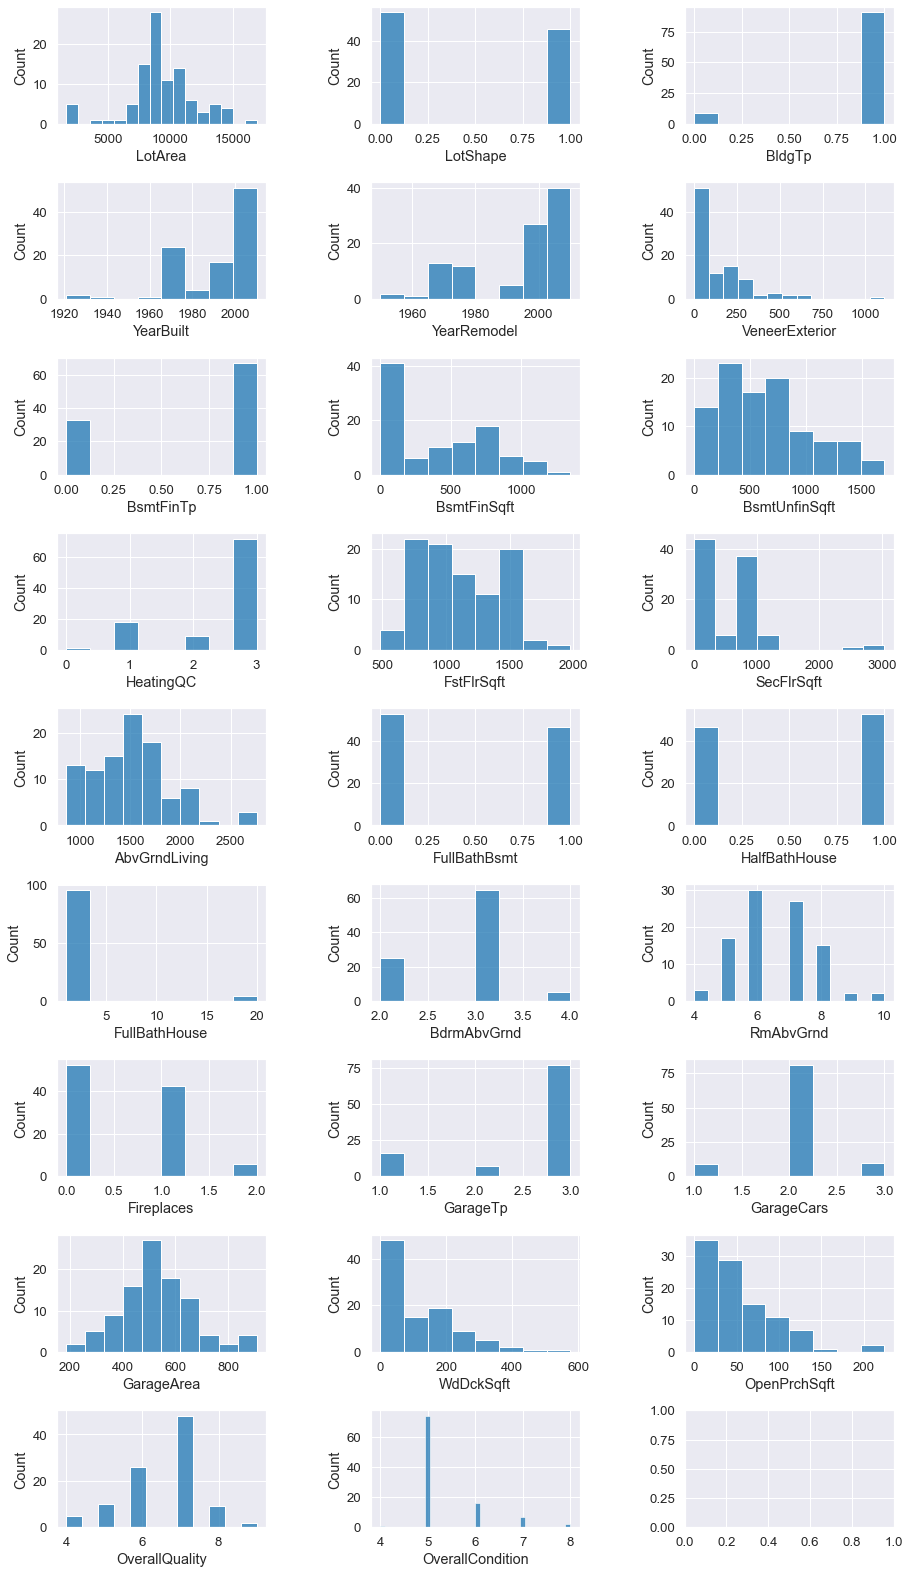

In [28]:
fig, axs = plt.subplots(9, 3, figsize=(15, 22))

sns.histplot(data=scoreData, x="LotArea", ax=axs[0, 0], color='tab:blue')
sns.histplot(data=scoreData, x="LotShape", ax=axs[0, 1], color='tab:blue')
sns.histplot(data=scoreData, x="BldgTp", ax=axs[0, 2], color='tab:blue')

sns.histplot(data=scoreData, x="YearBuilt", ax=axs[1, 0], color='tab:blue')
sns.histplot(data=scoreData, x="YearRemodel", ax=axs[1, 1], color='tab:blue')
sns.histplot(data=scoreData, x="VeneerExterior", ax=axs[1, 2], color='tab:blue')

sns.histplot(data=scoreData, x="BsmtFinTp", ax=axs[2, 0], color='tab:blue')
sns.histplot(data=scoreData, x="BsmtFinSqft", ax=axs[2, 1], color='tab:blue')
sns.histplot(data=scoreData, x="BsmtUnfinSqft", ax=axs[2, 2], color='tab:blue')

sns.histplot(data=scoreData, x="HeatingQC", ax=axs[3, 0], color='tab:blue')

sns.histplot(data=scoreData, x="FstFlrSqft", ax=axs[3, 1], color='tab:blue')
sns.histplot(data=scoreData, x="SecFlrSqft", ax=axs[3, 2], color='tab:blue')

sns.histplot(data=scoreData, x="AbvGrndLiving", ax=axs[4, 0], color='tab:blue')

sns.histplot(data=scoreData, x="FullBathBsmt", ax=axs[4, 1], color='tab:blue')
sns.histplot(data=scoreData, x="HalfBathHouse", ax=axs[4, 2], color='tab:blue')
sns.histplot(data=scoreData, x="FullBathHouse", ax=axs[5, 0], color='tab:blue')

sns.histplot(data=scoreData, x="BdrmAbvGrnd", ax=axs[5, 1], color='tab:blue')
sns.histplot(data=scoreData, x="RmAbvGrnd", ax=axs[5, 2], color='tab:blue')

sns.histplot(data=scoreData, x="Fireplaces", ax=axs[6, 0], color='tab:blue')

sns.histplot(data=scoreData, x="GarageTp", ax=axs[6, 1], color='tab:blue')
sns.histplot(data=scoreData, x="GarageCars", ax=axs[6, 2], color='tab:blue')
sns.histplot(data=scoreData, x="GarageArea", ax=axs[7, 0], color='tab:blue')

sns.histplot(data=scoreData, x="WdDckSqft", ax=axs[7, 1], color='tab:blue')
sns.histplot(data=scoreData, x="OpenPrchSqft", ax=axs[7, 2], color='tab:blue')
sns.histplot(data=scoreData, x="OverallQuality", ax=axs[8, 0], color='tab:blue')
sns.histplot(data=scoreData, x="OverallCondition", ax=axs[8, 1], color='tab:blue')

plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.99, bottom=0.03)
sns.set(font_scale=1.2)

plt.show()

The Histograms confirmed that the `propertyData` is indeed a good representation of `scoreData`.

To refine our data sets for the Modeling phase we had to make a critical decision regarding what variables to remove and what to keep. It is important to note that it is difficult to get reliable correlation statistics for categorical variables and thus we will only use interval variables in the correlation matrix to derive key insights regarding which interval variables we should turn our attention to determine `SalePrice`, our target variable. We will also not include `YearBuilt` and `YearRemodel` here because they are date variables and will be handled differently.

In [29]:
propertyDataInterval = propertyData [['LotArea','VeneerExterior','BsmtUnfinSqft', 'BsmtFinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
               'FullBathHouse', 'FullBathBsmt', 'BdrmAbvGrnd','RmAbvGrnd', 'Fireplaces', 'GarageCars', 'GarageArea','WdDckSqft', 'OpenPrchSqft', 
                'OverallQuality','OverallCondition','SalePrice']].copy()
propertyDataInterval.columns

Index(['LotArea', 'VeneerExterior', 'BsmtUnfinSqft', 'BsmtFinSqft',
       'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
       'FullBathHouse', 'FullBathBsmt', 'BdrmAbvGrnd', 'RmAbvGrnd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft',
       'OverallQuality', 'OverallCondition', 'SalePrice'],
      dtype='object')

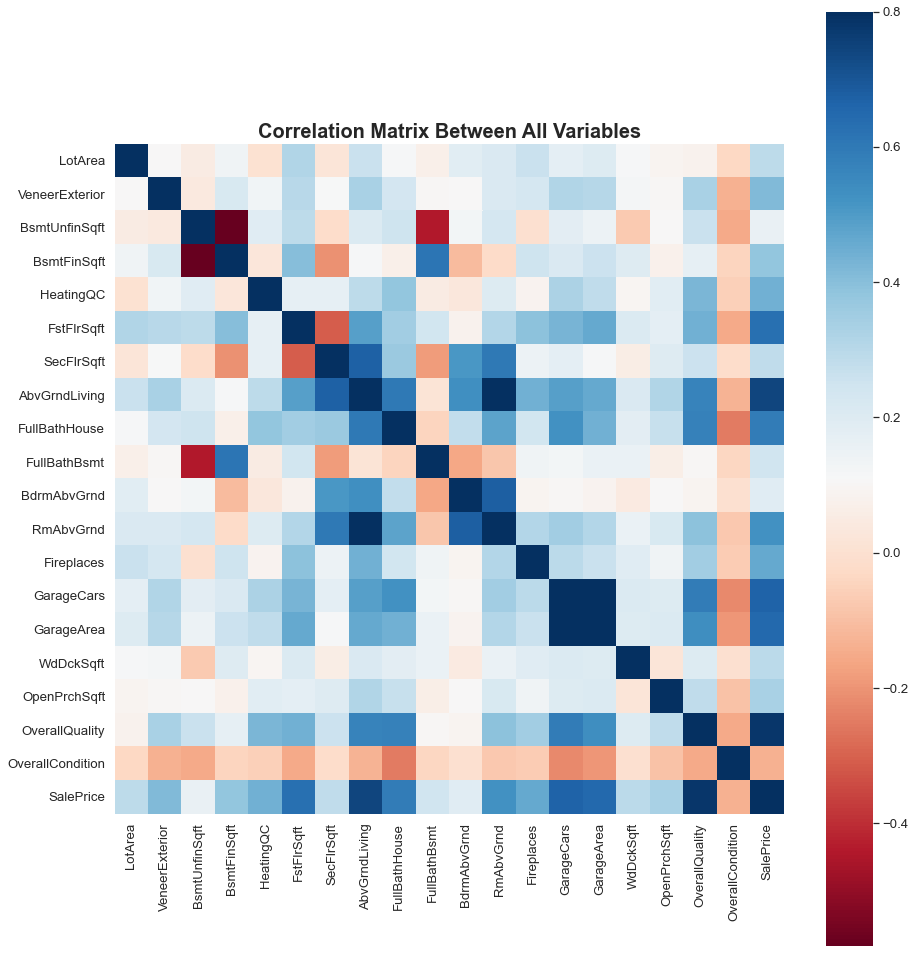

In [130]:
corrmat = propertyDataInterval.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="RdBu");
plt.subplots_adjust(wspace=1, hspace=0.5, top=0.99)
plt.title('Correlation Matrix Between All Variables', fontweight='bold', fontsize=20)
sns.set(font_scale=1.2)

Based on the hues above we singled out the variables that appeared to have a strong correlation with each other and created a simpler correlation matrix below. We made two matrices only for ease of analysis and visualization but they present almost the same information.

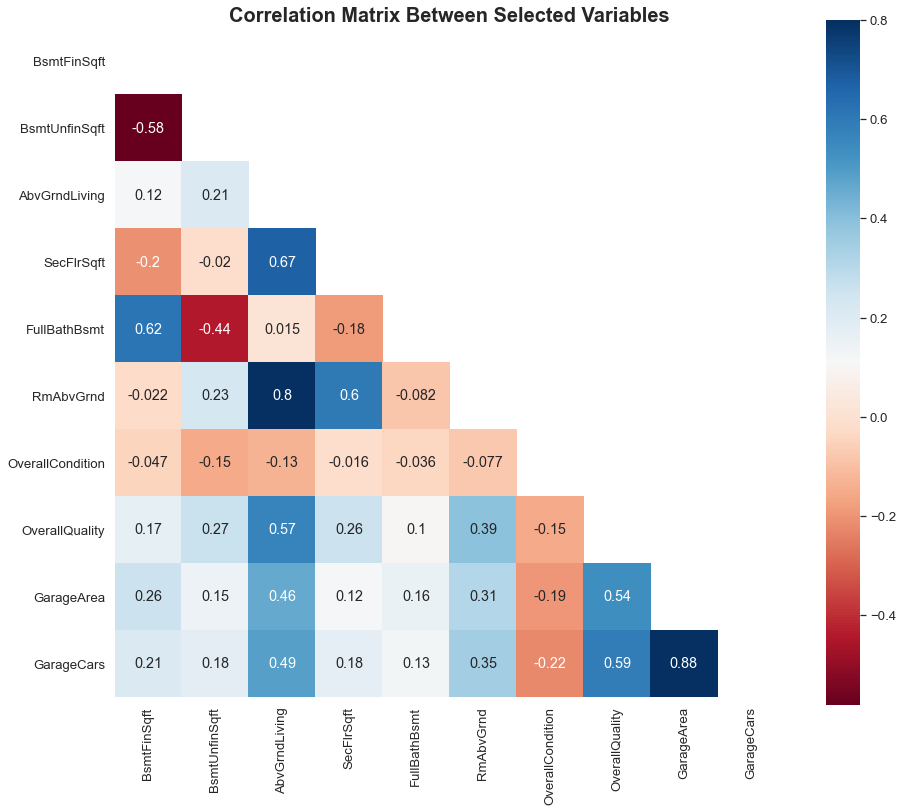

In [31]:
propertyDataSmall = propertyData[['BsmtFinSqft','BsmtUnfinSqft', 'AbvGrndLiving', 'SecFlrSqft', 'FullBathBsmt', 'RmAbvGrnd', 'OverallCondition','OverallQuality', 'GarageArea', 'GarageCars']]
corrmat = propertyDataSmall.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,11))
    ax = sns.heatmap(corrmat,  annot=True, vmax=.8, square=True, cmap="RdBu", mask=mask);
plt.subplots_adjust(wspace=1, hspace=0.5, top=0.99)
plt.title('Correlation Matrix Between Selected Variables', fontweight='bold', fontsize=20)
sns.set(font_scale=1.2)

From the above correlation matrix, we will turn our attention to variable pairs that have a correlation greater than 0.7 or less than -0.7. These include `RmAbvGrnd` and `AbvGrndLivingArea`. It makes sense because both variables refer to the living area above ground and the number of rooms above ground respectively. Intuitively, houses with a larger area usually have a greater number of rooms and it is clear that our dataset follows this trend too. 

We also noticed that `GarageArea` and `GarageCars` were highly correlated and, following the same logic as above, a garage with a larger area allows for more cars to be parked inside it.

We made scatter plots to visualize this trend.

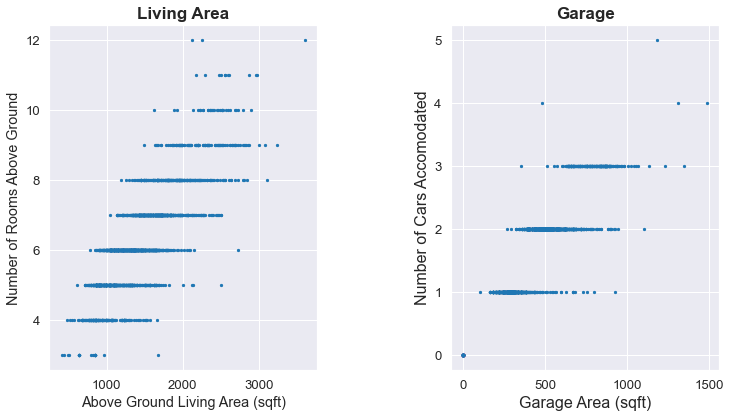

In [32]:
fig_scat = plt.figure(figsize=(12,5))
ax1 = fig_scat.add_subplot(1, 2, 1)
ax2 = fig_scat.add_subplot(1, 2, 2)

ax1.scatter(propertyData['AbvGrndLiving'], propertyData['RmAbvGrnd'], s = 5, color='tab:blue')
ax1.set_xlabel('Above Ground Living Area (sqft)')
ax1.set_ylabel('Number of Rooms Above Ground')
ax1.set_title('Living Area', fontsize=17, fontweight='bold')

ax2.scatter(propertyData['GarageArea'], propertyData['GarageCars'], s = 5, color='tab:blue')
ax2.set_xlabel('Garage Area (sqft)', fontsize=16)
ax2.set_ylabel('Number of Cars Accomodated', fontsize=16)

plt.title('Garage', fontsize=17, fontweight='bold')
plt.subplots_adjust(wspace=0.5, hspace=0.5, top=0.99, bottom=0.03)

To decide which variables to drop from the two pairs (`RmAbvGrnd`, `AbvGrndLivingArea`) and (`GarageCars`, `GarageArea`), we will look at their correlations with the target variable `SalePrice` and keep the ones that have a higher correlation with this target variable.

In [33]:
propertyDataInterval.corrwith(propertyDataInterval["SalePrice"])

LotArea             0.290162
VeneerExterior      0.415283
BsmtUnfinSqft       0.158441
BsmtFinSqft         0.384289
HeatingQC           0.438989
FstFlrSqft          0.629534
SecFlrSqft          0.284066
AbvGrndLiving       0.741919
FullBathHouse       0.590486
FullBathBsmt        0.247587
BdrmAbvGrnd         0.192239
RmAbvGrnd           0.527042
Fireplaces          0.462909
GarageCars          0.669653
GarageArea          0.652042
WdDckSqft           0.293314
OpenPrchSqft        0.334222
OverallQuality      0.780217
OverallCondition   -0.136934
SalePrice           1.000000
dtype: float64

Looking at the correlation statistics, We decided to drop `BdrmAbvGrnd` because it has a lower correlation (0.192239) than that of `AbvGrndLiving` (0.741919). We will also drop `GarageArea` because it has a lower correlation statistic (0.652042) compared to that of `GarageCars` (0.669653). All other interval variables seem to be appropriately correlated with the `SalePrice` so we decided to keep them until further analysis uncovers any key insights.

We performed Analysis of Variance (ANOVA) to analyze which categorical variables were statistically significant in presicting the `SalePrice`.

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('SalePrice ~ LotShape + BldgTp + BsmtFinSqft + HalfBathHouse',
                data=propertyData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df           F        PR(>F)
LotShape       4.642173e+11     1.0  162.363301  5.119637e-36
BldgTp         1.936248e+10     1.0    6.772165  9.316852e-03
BsmtFinSqft    1.277813e+12     1.0  446.924073  5.272080e-91
HalfBathHouse  8.239154e+11     1.0  288.170292  4.452577e-61
Residual       6.761835e+12  2365.0         NaN           NaN


Looking at the above p-values, all categorical variables are statistically significant in determining the `SalePrice`, given a 5% significance level.

We also noticed that the value of `BsmtFinTp` is 0 (basement is incomplete), when `BsmtFinSqft` is 0. For all other values of `BsmtFinSqft`, the value of `BsmtFinTp` is 1. Thus, we decided to eliminate the `BsmtFinTp` variable because it was adding no unique value to our models.

The key insight we were able to confirm from our EDA exercise is that correlations we would normally believe to be intuitively true from a business standpoint or a subjective standpoint are confirmed by the data, however the data also uncovers and gives us an additional layer of insight. Case in point, one would expect that a larger house will sell for a higher price and this was confirmed by observing the `AbvGrndLivingArea` vs `SalePrice` graph but also, we learned that on average, single-family homes (`BldgTp`=1) sold better than Townhouses (`BldgTp`=0).

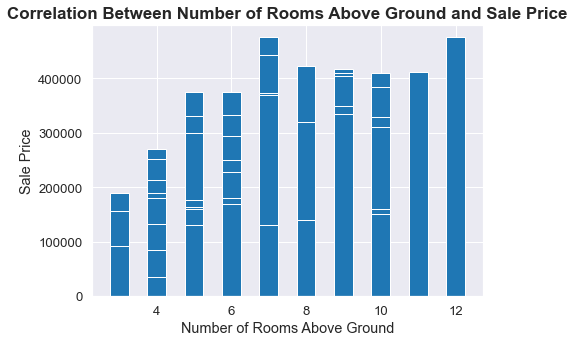

In [35]:
#plt.style.use('ggplot')
fignew = plt.figure(figsize=(7,5))

barplot = plt.bar(propertyData['RmAbvGrnd'], propertyData['SalePrice'], width=0.5, color='tab:blue')
barplot[0].set_color('blue')
plt.xlabel('Number of Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Correlation Between Number of Rooms Above Ground and Sale Price', fontweight='bold', fontsize=17)

plt.show()

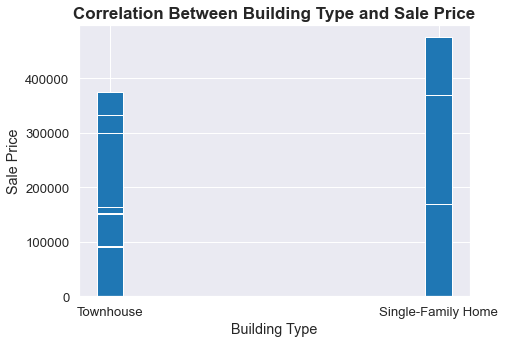

In [36]:
fignew = plt.figure(figsize=(7,5))

barplot = plt.bar(propertyData['BldgTp'], propertyData['SalePrice'], width=0.08, color='tab:blue')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.title('Correlation Between Building Type and Sale Price', fontweight='bold', fontsize=17)

plt.xticks([0.0,1.0],['Townhouse','Single-Family Home'])

plt.show()

We were especially interested in the role of two time variables, `YearBuilt` and `YearRemodel`. We calculated the number of years that had passed since the house had been built and/or remodelled from these variables respectively. It is important to note here that for houses that have not been remodelled, the `YearRemodel` is the same as `YearBuilt`. We will take this into account when calculating the number of years passed below.

In [37]:
from datetime import date
today = date.today()

In [38]:
propertyDataWithAges = propertyData
propertyDataWithAges

,PID,LotArea,LotShape,BldgTp,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,...,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality,OverallCondition
0,526301100,31770,0,1,1960,1960,112,1,639,441,...,7,2,3,2,528,210,62,215000,6,5
1,526350040,11622,1,1,1961,1961,0,1,468,270,...,5,0,3,1,730,140,0,105000,5,6
2,526351010,14267,0,1,1958,1958,108,1,923,406,...,6,0,3,1,312,393,36,172000,6,6
3,526353030,11160,1,1,1968,1968,0,1,1065,1045,...,8,2,3,2,522,0,0,244000,7,5
4,527105010,13830,0,1,1997,1998,0,1,791,137,...,6,1,3,2,482,212,34,189900,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,923251180,20000,1,1,1960,1996,0,1,1224,0,...,7,1,1,2,576,474,0,131000,5,7
2366,923275080,7937,0,1,1984,1984,0,1,819,184,...,6,0,1,2,588,120,0,142500,6,6
2367,923276100,8885,0,1,1983,1983,0,1,301,239,...,5,0,3,2,484,164,0,131000,5,5
2368,923400125,10441,1,1,1992,1992,0,1,337,575,...,6,0,0,0,0,80,32,132000,5,5


In [39]:
HouseAge = today.year-propertyData['YearBuilt']
propertyDataWithAges['HouseAge'] = pd.Series(HouseAge, index=propertyDataWithAges.index)

In [40]:
propertyDataWithAges = propertyData
propertyDataWithAges['Remodel'] = pd.Series(np.where(propertyData["YearBuilt"] == propertyData["YearRemodel"], 0, today.year-propertyData['YearRemodel']))

In [41]:
propertyDataWithAges

,PID,LotArea,LotShape,BldgTp,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,...,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality,OverallCondition,HouseAge,Remodel
0,526301100,31770,0,1,1960,1960,112,1,639,441,...,3,2,528,210,62,215000,6,5,61,0
1,526350040,11622,1,1,1961,1961,0,1,468,270,...,3,1,730,140,0,105000,5,6,60,0
2,526351010,14267,0,1,1958,1958,108,1,923,406,...,3,1,312,393,36,172000,6,6,63,0
3,526353030,11160,1,1,1968,1968,0,1,1065,1045,...,3,2,522,0,0,244000,7,5,53,0
4,527105010,13830,0,1,1997,1998,0,1,791,137,...,3,2,482,212,34,189900,5,5,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,923251180,20000,1,1,1960,1996,0,1,1224,0,...,1,2,576,474,0,131000,5,7,61,25
2366,923275080,7937,0,1,1984,1984,0,1,819,184,...,1,2,588,120,0,142500,6,6,37,0
2367,923276100,8885,0,1,1983,1983,0,1,301,239,...,3,2,484,164,0,131000,5,5,38,0
2368,923400125,10441,1,1,1992,1992,0,1,337,575,...,0,0,0,80,32,132000,5,5,29,0


We calculated the correlation of these new columns `HouseAge` and `Remodel` with SalePrice.

In [42]:
propertyDataWithAges[['HouseAge', 'Remodel', 'SalePrice']].corr()['SalePrice'][:]

HouseAge    -0.585731
Remodel     -0.285842
SalePrice    1.000000
Name: SalePrice, dtype: float64

As the correlations show, both variables were negatively correlated with the `SalePrice`. In hindsight, it makes sense because newer houses or those that have been remodelled more recently are generally more expensive. This was also confirmed visually by the scatterplots below. It is important to note here that the variable `Remodel` has a weak correlation with the target `SalePrice`, but we wanted to perform some additional analysis before deciding to drop it.

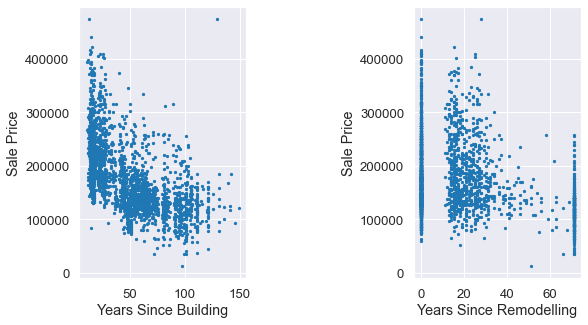

In [43]:
fig_scat = plt.figure(figsize=(9,5))
ax1 = fig_scat.add_subplot(1, 2, 1)
ax2 = fig_scat.add_subplot(1, 2, 2)

ax1.scatter(propertyDataWithAges['HouseAge'], propertyDataWithAges['SalePrice'], s = 5, color='tab:blue')
ax1.set_xlabel('Years Since Building')
ax1.set_ylabel('Sale Price')

ax2.scatter(propertyDataWithAges['Remodel'], propertyDataWithAges['SalePrice'], s = 5, color='tab:blue')
ax2.set_xlabel('Years Since Remodelling')
ax2.set_ylabel('Sale Price')

plt.subplots_adjust(wspace=1, hspace=0.1)


The next step was to check if `HouseAge` and `Remodel` were correlated with each other.

In [44]:
propertyDataWithAges['HouseAge'].corr(propertyDataWithAges['Remodel'])

0.6063877821029013

This correlation is also visualized in the graph below. For now, both variables do not seem to be too highly correlated but we will keep them for now.

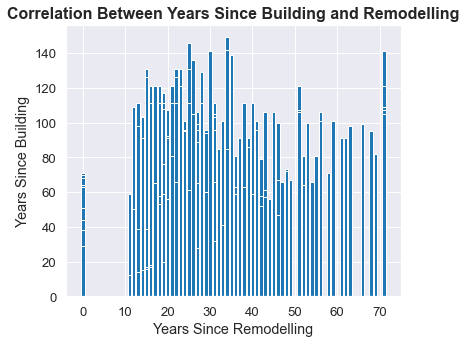

In [45]:
fignew = plt.figure(figsize=(6,5))

barplot = plt.bar(propertyDataWithAges['Remodel'], propertyDataWithAges['HouseAge'], width=0.8, color='tab:blue')
plt.xlabel('Years Since Remodelling')
plt.ylabel('Years Since Building')
plt.title('Correlation Between Years Since Building and Remodelling', fontweight='bold', fontsize=16)

plt.show()

We wanted to observe the number of years between building and remodelling. We will calculate a new column `TimeBwBuildRemodl`. For houses that have never been remodelled, the value of this new column is also 0.

In [46]:
propertyDataWithAges['TimeBwBuildRemodl'] = pd.Series(np.where(propertyDataWithAges["Remodel"] == 0, 0, propertyDataWithAges["HouseAge"]-propertyDataWithAges['Remodel']))

We then grouped the houses into two categories, those that had been remodelled and those that had never been remodelled, i.e., they have a `TimeBwBuildRemodl` value greater than 0 and equal to 0 respectively.

In [47]:
remodelledHouses, nonRemodelledHouses = [x for _, x in propertyData.groupby(propertyDataWithAges['TimeBwBuildRemodl'] == 0)]
remodelledHouses

,PID,LotArea,LotShape,BldgTp,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,...,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality,OverallCondition,HouseAge,Remodel,TimeBwBuildRemodl
4,527105010,13830,0,1,1997,1998,0,1,791,137,...,2,482,212,34,189900,5,5,24,23,1
8,527146030,5389,0,0,1995,1996,0,1,1180,415,...,2,608,237,152,236500,8,5,26,25,1
10,527163010,10000,0,1,1993,1994,0,0,0,763,...,2,440,157,84,175900,6,5,28,27,1
11,527165230,7980,0,1,1992,2007,0,1,935,233,...,2,420,483,21,185000,6,7,29,14,15
17,527302110,13175,1,1,1978,1988,119,1,790,589,...,2,500,349,0,210000,6,6,43,33,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,921205030,11443,1,1,2005,2006,208,1,1460,408,...,3,880,326,66,369900,8,5,16,15,1
2357,923225510,10172,0,1,1968,2003,0,1,441,423,...,1,288,0,120,126500,5,7,53,18,35
2360,923227100,13384,1,1,1969,1979,194,1,119,641,...,1,336,160,0,140000,5,5,52,42,10
2365,923251180,20000,1,1,1960,1996,0,1,1224,0,...,2,576,474,0,131000,5,7,61,25,36


The following graph shows the number of years between building and remodelling of the houses.

Text(0.5, 1.0, 'Time between Building and Remodelling (years)')

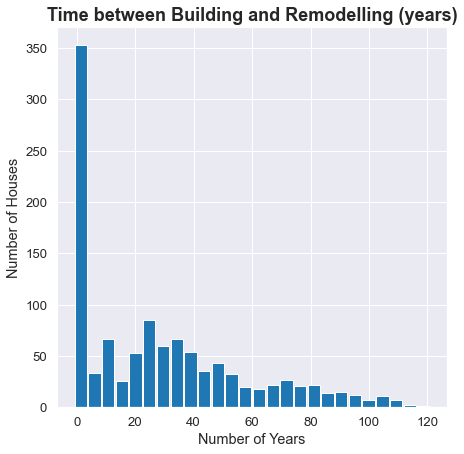

In [48]:
fignew = plt.figure(figsize=(7,7))
# "rwidth=" specifies the percent of the x range ocupied by each bin to be reserved for some white gap between bins
pltDifference = remodelledHouses['TimeBwBuildRemodl'].plot.hist(bins=26, rwidth=0.9, color='tab:blue')
plt.xlabel('Number of Years')
plt.ylabel('Number of Houses')
plt.title('Time between Building and Remodelling (years)', fontweight='bold', fontsize=18)

We wanted to observe how `TimeBwBuildRemodl` was correlated with `HouseAge`, `Remodel` and `SalePrice`.

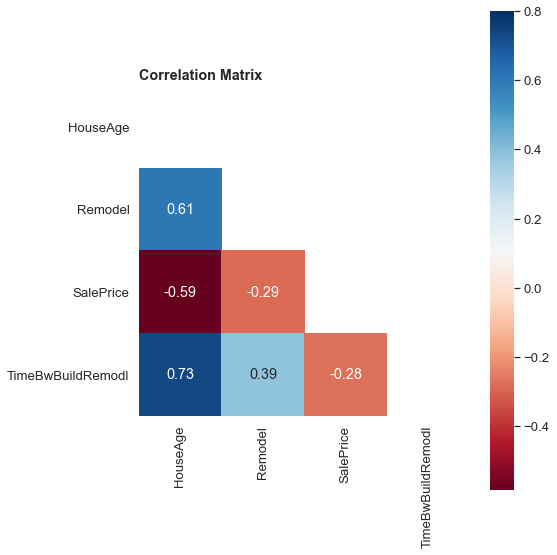

In [49]:
propertyDataSmall2 = propertyDataWithAges[['HouseAge', 'Remodel', 'SalePrice','TimeBwBuildRemodl']]
corrmat = propertyDataSmall2.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(corrmat,  annot=True, vmax=.8, square=True, cmap="RdBu", mask=mask);
plt.subplots_adjust(wspace=1, hspace=0.5, top=0.99)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.title('Correlation Matrix', fontweight='bold', loc='left')
sns.set(font_scale=1.5)

Looking at the correlations, we noticed that `Remodel` and `TimeBwBuildRemodl` are not strongly correlated with `SalePrice` and might not be a good measure to predict our target variable. Moreover, `HouseAge`, which is highly correlated with `SalePrice`, is also highly correlated with `Remodel` and `TimeBwBuildRemodl`. So dropping the latter two will serve two purposes - it will remove variables that are not statistically significant to predict the target variable, and it will remove the variables that are highly correlated with other independent variables, thus adding no unique value to the data. 

Once we had obtained the time data we needed, we decided to drop the original `YearBuilt` and `YearRemodel` variables because we have already gleaned all the useful information from them.

We will also make a histogram of the `HouseAge` variable to see how it is distributed.

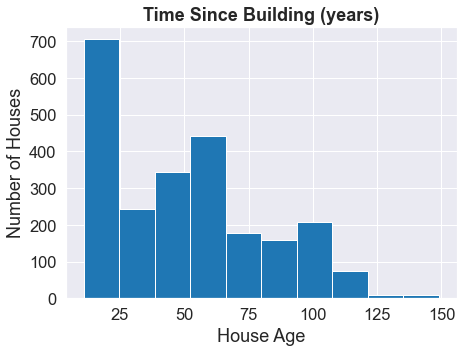

In [50]:
fig, ax = plt.subplots(figsize =(7, 5))
plt.hist(propertyDataWithAges['HouseAge'], label='x', color='tab:blue')
plt.xlabel('House Age')
plt.ylabel('Number of Houses')
plt.title('Time Since Building (years)', fontweight='bold')
plt.show()

#### List of Variables to be Dropped

Summarizing our EDA, we will drop the following variables in the data preparation phase before training models on our data:
- `BdrmAbvGrnd`
- `GarageArea`
- `BsmtFinTp`
- `Remodel`
- `TimeBwBuildRemodl`
- `YearBuilt`
- `YearRemodel`

## Phase 3: Data Preparation

This phase within the CRISP-DM standard is generally considered to be the most labor intensive and is comprised of all the aspects of preparing the final dataset used for every subsequent phase along with selecting the cases and variables to be analyzed as we had determined were appropriate previously. The work done in the Data Preparation phase acts as an important bridge between Phase 2: Data Understanding and Phase 4: Modelling. 

We begin this phase by dividing our data into three data frames:

- `IntervalPropertyData`
- `NominalPropertyData`
- `LogTrnsfmPropertyData`

We will also have another dataframe `CompletePropertyData` which contains all the variables we have decided to keep, regardless of their data type, and may be referred to later.

In [51]:
completeCols = ['PID', 'LotArea', 'LotShape', 'BldgTp', 'VeneerExterior', 'BsmtFinSqft', 
                'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
                'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse', 'RmAbvGrnd', 'Fireplaces', 
                'GarageTp', 'GarageCars', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice', 
                'OverallQuality', 'OverallCondition', 'HouseAge']
CompletePropertyData = propertyDataWithAges[completeCols].copy()
CompletePropertyData.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'VeneerExterior', 'BsmtFinSqft',
       'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'WdDckSqft',
       'OpenPrchSqft', 'SalePrice', 'OverallQuality', 'OverallCondition',
       'HouseAge'],
      dtype='object')

In [52]:
YData = CompletePropertyData[['SalePrice']]

#Dropping the target variable from the dataset
X = CompletePropertyData.drop(columns='SalePrice')

In [53]:
intervalCols = ['LotArea', 'OverallQuality', 'OverallCondition', 'FullBathBsmt', 
                 'RmAbvGrnd', 'GarageCars', 'FullBathHouse']
X_IntervalPropertyData = CompletePropertyData[intervalCols].copy()

In [54]:
NominalCols = ['LotShape', 'BldgTp','HalfBathHouse', 'GarageTp']
X_NominalPropertyData = CompletePropertyData[NominalCols].copy()  

In [55]:
LogCols = ['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 
           'SecFlrSqft', 'AbvGrndLiving', 'Fireplaces', 'WdDckSqft', 'OpenPrchSqft', 'HouseAge']
X_LogTrnsfmPropertyData = CompletePropertyData[LogCols].copy()

In [56]:
#sanity check
display(CompletePropertyData.shape, X_IntervalPropertyData.shape, X_NominalPropertyData.shape, X_LogTrnsfmPropertyData.shape)

(2370, 24)

(2370, 7)

(2370, 4)

(2370, 11)

### Pipelines
We made pipelines to process our data. Pipelines are more efficient in automating the processes of imputation, creating flag variables, standardization and log transformation as compared to performing these steps manually. 

#### Pipeline 1
We imputed the missing values in the nominal variables and used One Hot Encoding to create dummy variables. We then clean the column labels in the output dataframe.

In [57]:
#Pipeline 1 for X_NominalPropertyData
#Pipeline 1: nominal variables only -> impute missing values -> One Hot Encoding (then clean labels)
transformerNominal = make_pipeline(SimpleImputer(strategy = 'most_frequent'), preprocessing.OneHotEncoder())

#Adding col levels to output
oneHotEncoder = preprocessing.OneHotEncoder()
oneHotEncoder.fit(X_NominalPropertyData)
Pipeline1_levels = ['_'.join([item[0], str(label)]) for item in zip(NominalCols, oneHotEncoder.categories_) for label in item[1].tolist()]

In [58]:
# test Pipeline 1
pipeline1_output =transformerNominal.fit_transform(X_NominalPropertyData).toarray()
pipe1output = pd.DataFrame(pipeline1_output, columns=Pipeline1_levels, index=X_NominalPropertyData.index)
pipe1output.head()

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Pipeline 2: 
We imputed the missing values in the interval variables (with skewed distributions) and performed logarithm transformation to remove skewness and z-standardized the resulting dataframe.

In [59]:
# Pipeline 2 for X_LogTrnsfmPropertyData
## Pipeline 2: interval variables that need logarithm transformation -> impute missing values -> 
##               log1p transformation -> z-standardization

transformerlogarithm = make_pipeline(SimpleImputer(strategy = 'median'), 
                                       preprocessing.FunctionTransformer(np.log1p, validate=False),
                                       preprocessing.StandardScaler())

Pipeline2_levels = X_LogTrnsfmPropertyData.add_suffix('Log1p_z').columns.tolist()


In [60]:
# test Pipeline 2
pipeline2_output = transformerlogarithm.fit_transform(X_LogTrnsfmPropertyData)
pipe2output = pd.DataFrame(pipeline2_output, columns=Pipeline2_levels, index=X_LogTrnsfmPropertyData.index)
pipe2output.head()

,VeneerExteriorLog1p_z,BsmtFinSqftLog1p_z,BsmtUnfinSqftLog1p_z,HeatingQCLog1p_z,FstFlrSqftLog1p_z,SecFlrSqftLog1p_z,AbvGrndLivingLog1p_z,FireplacesLog1p_z,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z
0,1.086051,0.731625,0.196125,-3.100568,1.446934,-0.869290,0.594628,1.830227,1.126685,0.857098,0.586455
1,-0.762629,0.624542,-0.112734,-1.134710,-0.571243,-0.869290,-1.414213,-0.995837,0.970747,-1.073082,0.561398
2,1.071958,0.858128,0.144039,-1.134710,0.724024,-0.869290,-0.124937,-0.995837,1.368268,0.609151,0.635378
3,-0.762629,0.907372,0.739997,0.831147,2.243253,-0.869290,1.387264,1.830227,-0.943665,-1.073082,0.373570
4,-0.762629,0.805028,-0.538822,0.015243,-0.455972,1.139904,0.540852,0.787211,1.130334,0.583263,-0.813139


#### Pipeline 3:
We took the remaining interval variables (without skewed distributions), imputed the missing values and performed z-standardization on them.

In [61]:
# make Pipeline 3 for X_IntervalPropertyData
## Pipeline 3: the interval variables -> impute missing values -> z-standardization
transformerInterval = make_pipeline(SimpleImputer(strategy = 'median'), preprocessing.StandardScaler())

Pipeline3_levels = X_IntervalPropertyData.add_suffix('_z').columns.tolist()

In [62]:
# test Pipeline 3
pipeline3_output = transformerInterval.fit_transform(X_IntervalPropertyData)
pipe3output = pd.DataFrame(pipeline3_output, columns=Pipeline3_levels, index=X_IntervalPropertyData.index)
pipe3output.head()

,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
0,3.587059,-0.040437,-0.575434,1.184758,0.532453,0.396435,-1.012751
1,0.312256,-0.839058,0.337403,-0.844054,-0.903987,-1.014303,-1.012751
2,0.742168,-0.040437,0.337403,-0.844054,-0.185767,-1.014303,-1.012751
3,0.237164,0.758185,-0.575434,1.184758,1.250673,0.396435,0.980787
4,0.671139,-0.839058,-0.575434,-0.844054,-0.185767,0.396435,0.980787


#### Executing the Pipelines
We then combined all three pipelines into a columnTransformer and executed them to get a dataframe `Preprocessed_data`.

In [63]:
# combine all 3 Pipelines into a ColumnTransformer
preprocessor = make_column_transformer((transformerNominal, NominalCols), 
                                       (transformerlogarithm, LogCols),
                                       (transformerInterval, intervalCols))

# Levels
labelsPreprocessor = [label for labels in [Pipeline1_levels, Pipeline2_levels, Pipeline3_levels] for label in labels]
print(labelsPreprocessor)

['LotShape_0', 'LotShape_1', 'BldgTp_0', 'BldgTp_1', 'HalfBathHouse_0', 'HalfBathHouse_1', 'GarageTp_0', 'GarageTp_1', 'GarageTp_2', 'GarageTp_3', 'VeneerExteriorLog1p_z', 'BsmtFinSqftLog1p_z', 'BsmtUnfinSqftLog1p_z', 'HeatingQCLog1p_z', 'FstFlrSqftLog1p_z', 'SecFlrSqftLog1p_z', 'AbvGrndLivingLog1p_z', 'FireplacesLog1p_z', 'WdDckSqftLog1p_z', 'OpenPrchSqftLog1p_z', 'HouseAgeLog1p_z', 'LotArea_z', 'OverallQuality_z', 'OverallCondition_z', 'FullBathBsmt_z', 'RmAbvGrnd_z', 'GarageCars_z', 'FullBathHouse_z']


In [64]:
# execution of ColumnTransformer and Pipelines

Preprocessor_output = preprocessor.fit_transform(X)
Preprocessed_data = pd.DataFrame(Preprocessor_output, columns=labelsPreprocessor, index=X.index)
display(Preprocessed_data.shape, Preprocessed_data.head(), Preprocessed_data.tail())

(2370, 28)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.126685,0.857098,0.586455,3.587059,-0.040437,-0.575434,1.184758,0.532453,0.396435,-1.012751
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.970747,-1.073082,0.561398,0.312256,-0.839058,0.337403,-0.844054,-0.903987,-1.014303,-1.012751
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.368268,0.609151,0.635378,0.742168,-0.040437,0.337403,-0.844054,-0.185767,-1.014303,-1.012751
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.943665,-1.073082,0.373570,0.237164,0.758185,-0.575434,1.184758,1.250673,0.396435,0.980787
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.130334,0.583263,-0.813139,0.671139,-0.839058,-0.575434,-0.844054,-0.185767,0.396435,0.980787


,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
2365,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.440594,-1.073082,0.586455,1.673994,-0.839058,1.250240,1.184758,0.532453,0.396435,-1.012751
2366,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.911572,-1.073082,-0.167921,-0.286694,-0.040437,0.337403,1.184758,-0.185767,0.396435,-1.012751
2367,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.031554,-1.073082,-0.127894,-0.132609,-0.839058,-0.575434,1.184758,-0.903987,0.396435,-1.012751
2368,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.756314,0.555851,-0.532188,0.120300,-0.839058,-0.575434,-0.844054,-0.185767,-2.425041,-1.012751
2369,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.178112,0.633677,0.192071,0.050246,-0.839058,-0.575434,1.184758,-0.185767,0.396435,-1.012751


We then created a new dataframe `WeightedFlags` by replacing the 1 values in the flag variable with 0.707. This dataframe will be copied to the `Preprocessed_data_KNN` dataframe which was used in the k-nearest neighbor model.

In [65]:
#All flag variables changed from 1 to 0.707
WeightedFlags = Preprocessed_data[Pipeline1_levels].replace(to_replace={1: 0.707})
WeightedFlags.head()

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3
0,0.707,0.000,0.0,0.707,0.707,0.000,0.0,0.0,0.0,0.707
1,0.000,0.707,0.0,0.707,0.707,0.000,0.0,0.0,0.0,0.707
2,0.707,0.000,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707
3,0.000,0.707,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707
4,0.707,0.000,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707


In [66]:
#New dataframe for KNN
Preprocessed_data_KNN = Preprocessed_data.copy()
Preprocessed_data_KNN[Pipeline1_levels] = WeightedFlags
display(Preprocessed_data_KNN.shape, Preprocessed_data_KNN.head(), Preprocessed_data_KNN.tail())

(2370, 28)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
0,0.707,0.000,0.0,0.707,0.707,0.000,0.0,0.0,0.0,0.707,...,1.126685,0.857098,0.586455,3.587059,-0.040437,-0.575434,1.184758,0.532453,0.396435,-1.012751
1,0.000,0.707,0.0,0.707,0.707,0.000,0.0,0.0,0.0,0.707,...,0.970747,-1.073082,0.561398,0.312256,-0.839058,0.337403,-0.844054,-0.903987,-1.014303,-1.012751
2,0.707,0.000,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707,...,1.368268,0.609151,0.635378,0.742168,-0.040437,0.337403,-0.844054,-0.185767,-1.014303,-1.012751
3,0.000,0.707,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707,...,-0.943665,-1.073082,0.373570,0.237164,0.758185,-0.575434,1.184758,1.250673,0.396435,0.980787
4,0.707,0.000,0.0,0.707,0.000,0.707,0.0,0.0,0.0,0.707,...,1.130334,0.583263,-0.813139,0.671139,-0.839058,-0.575434,-0.844054,-0.185767,0.396435,0.980787


,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
2365,0.000,0.707,0.0,0.707,0.707,0.0,0.000,0.707,0.0,0.000,...,1.440594,-1.073082,0.586455,1.673994,-0.839058,1.250240,1.184758,0.532453,0.396435,-1.012751
2366,0.707,0.000,0.0,0.707,0.707,0.0,0.000,0.707,0.0,0.000,...,0.911572,-1.073082,-0.167921,-0.286694,-0.040437,0.337403,1.184758,-0.185767,0.396435,-1.012751
2367,0.707,0.000,0.0,0.707,0.707,0.0,0.000,0.000,0.0,0.707,...,1.031554,-1.073082,-0.127894,-0.132609,-0.839058,-0.575434,1.184758,-0.903987,0.396435,-1.012751
2368,0.000,0.707,0.0,0.707,0.707,0.0,0.707,0.000,0.0,0.000,...,0.756314,0.555851,-0.532188,0.120300,-0.839058,-0.575434,-0.844054,-0.185767,-2.425041,-1.012751
2369,0.000,0.707,0.0,0.707,0.707,0.0,0.000,0.000,0.0,0.707,...,1.178112,0.633677,0.192071,0.050246,-0.839058,-0.575434,1.184758,-0.185767,0.396435,-1.012751


In [67]:
#Target variable
YData = CompletePropertyData[['SalePrice']]

#Standardize Target variable
yScaler = preprocessing.StandardScaler()
YData1 = pd.DataFrame(yScaler.fit_transform(YData), columns=['G3'])
YData1.head(3)

,G3
0,0.644154
1,-1.072790
2,-0.027015


### Data Partitioning
We partition the data source as a strategy to assess the quality of our model. This procedure called data partitioning requires us to use a portion of  the training data set for preliminary model fitting while we reserve the rest to be used for empirical validation. Within this reserved portion of the data, we further split it into two parts as a validation data set and a test data set. The purpose of the validation data set is primarily to prevent the modeling node from overfitting the training data but also to compare the models as well whereas the test data will be used as a means of final assessment for the model.

#### Data Splitting for Linear regression

In [68]:
#Train and test spilt for Linear regression
x_train, x_test, y_train, y_test = train_test_split(Preprocessed_data,YData1,test_size = 0.3)

In [69]:
#sanity check
len(x_train)

1659

In [70]:
x_train.head(3)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
680,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.111732,1.267414,-1.081811,0.347364,1.556806,-0.575434,-0.844054,0.532453,0.396435,0.980787
2065,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.186055,0.842068,0.838133,-0.038825,-0.839058,0.337403,-0.844054,0.532453,-1.014303,-1.012751
338,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.208952,-1.073082,0.192071,-1.201617,-0.040437,-0.575434,-0.844054,-0.185767,0.396435,0.980787


In [71]:
len(y_train)

1659

In [72]:
y_train.head(3)

,G3
680,0.979739
2065,-0.573315
338,-0.417229


In [73]:
len(x_test)

711

In [74]:
x_test.head(3)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
701,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.943665,-1.073082,0.611111,-0.534889,-1.637679,-0.575434,-0.844054,-0.903987,-1.014303,-1.012751
194,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.943665,-1.073082,0.429611,-0.308962,-0.839058,1.250240,1.184758,-0.903987,-1.014303,-1.012751
737,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.943665,-1.073082,1.276154,0.081128,-1.637679,0.337403,-0.844054,-1.622208,-1.014303,-1.012751


In [75]:
len(y_test)

711

In [76]:
y_test.head(3)

,G3
701,-1.384961
194,-0.559268
737,-1.541047


#### Data Splitting for KNN model

In [77]:
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(Preprocessed_data_KNN,YData1,test_size = 0.3)

In [78]:
#Sanity Check
print('Length of x_trainknn :{}'.format(len(x_trainknn)))
print('Length of x_testknn :{}'.format(len(x_testknn)))
print('Length of y_trainknn :{}'.format(len(y_trainknn)))
print('Length of y_testknn :{}'.format(len(y_testknn )))

Length of x_trainknn :1659
Length of x_testknn :711
Length of y_trainknn :1659
Length of y_testknn :711


In [79]:
x_trainknn.head(3)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
848,0.707,0.000,0.000,0.707,0.000,0.707,0.000,0.000,0.0,0.707,...,1.040820,-1.073082,-0.752701,0.209533,0.758185,-0.575434,1.184758,4.123553,0.396435,0.980787
1893,0.000,0.707,0.707,0.000,0.000,0.707,0.000,0.707,0.0,0.000,...,0.716086,-1.073082,0.223844,-1.259318,-0.040437,-0.575434,-0.844054,-0.903987,-1.014303,-1.012751
700,0.000,0.707,0.000,0.707,0.707,0.000,0.707,0.000,0.0,0.000,...,-0.943665,1.397591,0.879783,-0.048089,-0.839058,3.075913,-0.844054,-1.622208,-2.425041,-1.012751


In [80]:
x_testknn.head(3)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
2245,0.707,0.000,0.0,0.707,0.000,0.707,0.0,0.000,0.707,0.000,...,0.986868,1.033503,-1.156995,0.609374,0.758185,-0.575434,1.184758,1.250673,0.396435,0.980787
2193,0.000,0.707,0.0,0.707,0.707,0.000,0.0,0.000,0.000,0.707,...,-0.943665,-1.073082,0.635378,0.641882,-0.839058,-0.575434,1.184758,1.250673,0.396435,0.980787
1172,0.000,0.707,0.0,0.707,0.707,0.000,0.0,0.707,0.000,0.000,...,-0.943665,-1.073082,0.728798,-0.248498,-1.637679,0.337403,-0.844054,0.532453,-1.014303,0.980787


In [81]:
y_trainknn.head(3)

,G3
848,1.650908
1893,-1.416179
700,-0.869878


In [82]:
y_testknn.head(3)

,G3
2245,0.410025
2193,-0.019211
1172,-0.604532


## Phase 4: Modelling
The modeling phase signals the start of the analysis portion of our project, the most significant portion, as it will ultimately result in a set of recommendations for the choice properties for our client. In this phase of CRISP-DM we are selecting and applying appropriate modeling techniques and calibrating each model’s settings to obtain optimum results. As is often the case with Data Mining, we applied several different techniques for our predictive analytics problem and had to recede back to an earlier stage of the CRISP-DM process, the Data Preparation phase, to use the data that is most in line with the specific requirements of a given data mining technique. The models we specifically considered for our project were k nearest neighbor (knn), and Regression Analysis. The reason why we picked these  models is because the purpose of the project is to predict the sales price and these models are best for prediction. Secondly, the target variable itself, Sale Price, is an interval variable and since our primary aim is prediction, not classification as it could be for a categorical variable, our team decided that it is most prudent to use the modeling techniques mentioned. We will briefly show our modeling procedures for each of these techniques as done in SAS EM following a discussion and comparison stating our ultimate pick for our model of choice for the project in the Modeling Rationale section.

### Regression

Regression Analysis is a good first pick for a model of choice due to its relative simplicity and usability with transformed and standardized data. In terms of its simplicity, regression analysis requires a dependent variable that varies based on the value of an independent variable. Our main concern with using Regression is that the problem we have on hand is moderately complex and linear models such as regression have lower performance and reliability if the data required to perform a future analysis for this project increases. We decide to compare it with the knn model in the evaluation phase to see which one performed better.

#### Prepare Data for Modeling
We made the `y` and `X` dataFrames to feed into the `LinearRegression` function of `sklearn`.

In [83]:
#linear regression instance
regressionRFE = lm.LinearRegression()

In [84]:
# fit 14 times each with a different n_features_to_select value and the results stored in 14 columns
retained_values = pd.DataFrame()
for i in range(1, 29, 2):
    temp = RFE(regressionRFE, n_features_to_select = i)
    temp.fit(X = x_train, y = y_train)
    retained_values['retained_' + str(i)] = temp.get_support()

display(retained_values.shape, retained_values.sum())

(28, 14)

retained_1      1
retained_3      3
retained_5      5
retained_7      7
retained_9      9
retained_11    11
retained_13    13
retained_15    15
retained_17    17
retained_19    19
retained_21    21
retained_23    23
retained_25    25
retained_27    27
dtype: int64

In [85]:
# x-valid scores for each selected features using the 19 iterations 
regression = lm.LinearRegression()
xvalid_reg = pd.DataFrame()
for label, content in retained_values.iteritems():
    selected_labels_list = x_train.columns[content.to_numpy()]
    xvalid_reg[label] = cross_val_score(regression, X =x_train[selected_labels_list], y = y_train, cv = 10, 
                                           scoring = 'neg_mean_squared_error')

xvalid_reg.shape

(10, 14)

In [86]:
xvalid_mean_reg = xvalid_reg.mean()
xvalid_mean_reg

retained_1    -0.394618
retained_3    -0.288815
retained_5    -0.213674
retained_7    -0.203736
retained_9    -0.174412
retained_11   -0.169669
retained_13   -0.161169
retained_15   -0.160909
retained_17   -0.160181
retained_19   -0.159760
retained_21   -0.159794
retained_23   -0.159500
retained_25   -0.159261
retained_27   -0.159301
dtype: float64

In [87]:
max(xvalid_mean_reg)

-0.15926126976420454

In [88]:
x_train.columns[retained_values["retained_27"]]

Index(['LotShape_0', 'LotShape_1', 'BldgTp_0', 'BldgTp_1', 'HalfBathHouse_0',
       'HalfBathHouse_1', 'GarageTp_0', 'GarageTp_1', 'GarageTp_2',
       'GarageTp_3', 'VeneerExteriorLog1p_z', 'BsmtFinSqftLog1p_z',
       'HeatingQCLog1p_z', 'FstFlrSqftLog1p_z', 'SecFlrSqftLog1p_z',
       'AbvGrndLivingLog1p_z', 'FireplacesLog1p_z', 'WdDckSqftLog1p_z',
       'OpenPrchSqftLog1p_z', 'HouseAgeLog1p_z', 'LotArea_z',
       'OverallQuality_z', 'OverallCondition_z', 'FullBathBsmt_z',
       'RmAbvGrnd_z', 'GarageCars_z', 'FullBathHouse_z'],
      dtype='object')

It is clear that the negative mean squared error rises until it finds the highest point at `retained_27` model until it starts to drops.

### K Nerarest Neighbor (knn)

The main advantages for using this model is the fact that it is an instance-based learning method that learns from the data set as it is making real time predictions. This also means that kNN is a _fast_ algorithm when compared to other algorithms such as Linear Regression which need training. KNN is also _simpler_ than the other models requiring primarily two major inputs: the value of K and the distance function e.g., Euclidean.

The main disadvantage of kNN is that it does not work well with large datasets or high dimensional data. In large datasets it is too cumbersome to calculate the distance between new points and all the existing points which affects the algorithms overall performance whereas dimensional data have an added level of complexity forcing the algorithm to calculate distance in each dimension. Additionally, the kNN algorithm is sensitive to noisy data and requires standardization and normalization if we want it to generate accurate predictions. 

In [89]:
N = len(Preprocessed_data_KNN)
K = 1 + (N/500)
K

5.74

In [90]:
Knn_Xvalid = pd.DataFrame()
for i in range(5, 29):
    temp_knn = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    Knn_Xvalid['k_' + str(i)] = cross_val_score(temp_knn, X = x_trainknn, y = y_trainknn, cv = 10, 
                                                      scoring = 'neg_mean_squared_error')

In [91]:
mean_knnXvalid = Knn_Xvalid.mean()
mean_knnXvalid

k_5    -0.176142
k_6    -0.174922
k_7    -0.172317
k_8    -0.170769
k_9    -0.169276
k_10   -0.169323
k_11   -0.170432
k_12   -0.169520
k_13   -0.169527
k_14   -0.169235
k_15   -0.169694
k_16   -0.169534
k_17   -0.170172
k_18   -0.170944
k_19   -0.171649
k_20   -0.171109
k_21   -0.170656
k_22   -0.170409
k_23   -0.170429
k_24   -0.171159
k_25   -0.172441
k_26   -0.172002
k_27   -0.172680
k_28   -0.173142
dtype: float64

In [92]:
max(mean_knnXvalid)

-0.16923456528771336

It is clear from the above, that the mean objective function rises until `k_10` and starts dropping after that.

## Phase 5: Evaluation

In this phase, we compared the models we made to see which one was a better fit for our data. We started by visualizing the stored mean x-valid scores of regression model results:

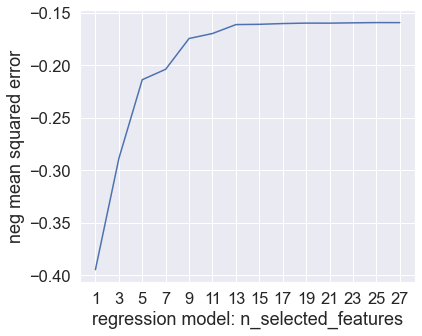

In [93]:
newfig = plt.figure(figsize=(6,5))
# below codes use an anonymous function
s_numbering = pd.Series(xvalid_mean_reg.index).apply(lambda x:x[9:]).astype(int)
xvalid_mean_reg_copy = xvalid_mean_reg.copy()
xvalid_mean_reg_copy.index = s_numbering
figXvalReg = xvalid_mean_reg_copy.plot.line()

figXvalReg.set_xlabel('regression model: n_selected_features')
figXvalReg.set_ylabel('neg mean squared error')
figXvalReg.set_xticks(s_numbering)

Clearly, the regression model with 27 selected features has the highest x-valid score (i.e., largest mean "neg_mean_squared_error"). Thus the model `retained_27` is the best x-valid performance model of regression models.

To be precise, we sorted the results:

In [94]:
xvalid_mean_reg.sort_values(ascending=False)

retained_25   -0.159261
retained_27   -0.159301
retained_23   -0.159500
retained_19   -0.159760
retained_21   -0.159794
retained_17   -0.160181
retained_15   -0.160909
retained_13   -0.161169
retained_11   -0.169669
retained_9    -0.174412
retained_7    -0.203736
retained_5    -0.213674
retained_3    -0.288815
retained_1    -0.394618
dtype: float64

We then wanted to visualize the stored mean x-valid scores of the knn model.

<ipython-input-95-9447d1043e87>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_numbering = pd.Series(mean_knnXvalid.index).apply(lambda x:x[2:]).astype(np.int)


Text(0, 0.5, 'neg mean squared error')

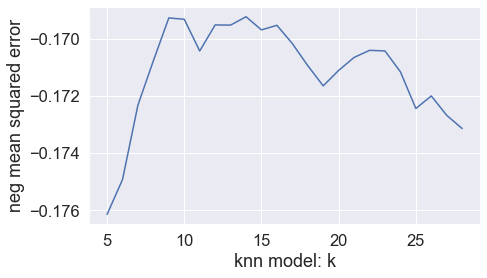

In [95]:
newfig = plt.figure(figsize=(7,4))
s_numbering = pd.Series(mean_knnXvalid.index).apply(lambda x:x[2:]).astype(np.int)
xvalid_mean_knnlwa_copy = mean_knnXvalid.copy()
xvalid_mean_knnlwa_copy.index = s_numbering
figXvalKnn = xvalid_mean_knnlwa_copy.plot.line()
figXvalKnn.set_xlabel('knn model: k')
figXvalKnn.set_ylabel('neg mean squared error')

Clearly, the knn model with 10 selected features has the highest x-valid score (i.e., largest mean "neg_mean_squared_error") and is the best among all the knn models.

To be precise, we sorted the results:

In [96]:
mean_knnXvalid.sort_values(ascending=False)

k_14   -0.169235
k_9    -0.169276
k_10   -0.169323
k_12   -0.169520
k_13   -0.169527
k_16   -0.169534
k_15   -0.169694
k_17   -0.170172
k_22   -0.170409
k_23   -0.170429
k_11   -0.170432
k_21   -0.170656
k_8    -0.170769
k_18   -0.170944
k_20   -0.171109
k_24   -0.171159
k_19   -0.171649
k_26   -0.172002
k_7    -0.172317
k_25   -0.172441
k_27   -0.172680
k_28   -0.173142
k_6    -0.174922
k_5    -0.176142
dtype: float64

The next step was to compare the mean_squared_error of the selected regression and knn models to see which was the most appropriate model to predict the target variable `SalePrice`.

In [97]:
# train the model for selected 27 features
temp = RFE(regressionRFE, n_features_to_select = 27)
temp.fit(X = x_train, y = y_train)

#prediction for x_test
y_pred =temp.predict(X = x_test)

In [98]:
mean_squared_error(y_test,y_pred)

0.13463115912333895

In [99]:
# train the model for KNN
temp_knn = knn.KNeighborsRegressor(n_neighbors=10, weights='distance')
temp_knn.fit(X = x_trainknn, y = y_trainknn)

#prediction for x_test
y_predknn =temp_knn.predict(X = x_testknn)

In [100]:
mean_squared_error(y_testknn,y_predknn)

0.1626153716125554

The mean squared error of the regression model is less than the mean squared error of the kNN model. Hence, we will pick the regression model as our final model.

## Phase 6: Deployment

In the final phase of the CRISP-DM standard we have followed throughout the project we are presenting our recommendation for the top 20 properties ranked with their sales price based on our model. 

We started by doing some light preprocessing on the `scoreData`.

In [101]:
#calculate houseAge in score data
scoreHouseAge = today.year-propertyData['YearBuilt']
scoreData['HouseAge'] = pd.Series(scoreHouseAge, index=propertyDataWithAges.index)

In [102]:
#drop extra columns in scoreData
scoreCols = ['PID', 'LotArea', 'LotShape', 'BldgTp', 'VeneerExterior', 'BsmtFinSqft', 
                'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
                'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse', 'RmAbvGrnd', 'Fireplaces', 
                'GarageTp', 'GarageCars', 'WdDckSqft', 'OpenPrchSqft', 'OverallQuality', 
             'OverallCondition', 'HouseAge']
scoreData = scoreData[scoreCols].copy()

In [103]:
nrow_score, ncol_score = scoreData.shape
nrow_score, ncol_score

(100, 23)

In [104]:
scoreData.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'VeneerExterior', 'BsmtFinSqft',
       'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'WdDckSqft',
       'OpenPrchSqft', 'OverallQuality', 'OverallCondition', 'HouseAge'],
      dtype='object')

In [105]:
scoreData.head(3)

,PID,LotArea,LotShape,BldgTp,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,WdDckSqft,OpenPrchSqft,OverallQuality,OverallCondition,HouseAge
0,528445060,8987,1,1,226.0,0,1595,3,1595.0,0.0,...,2,6.0,1,3,3,144,0,8,5,61
1,528456160,9215,1,1,0.0,0,1218,3,1218.0,0.0,...,2,4.0,0,3,2,0,136,7,5,60
2,528458070,8640,1,1,0.0,24,732,3,764.0,783.0,...,2,7.0,0,3,2,169,45,7,5,63


To prevent from merging our score data with train data, we modified the index values of score DataFrame so that they have no overlap with train DataFrame. It is important to note here that after modifying, the beginning index of score data was much larger than the ending index of train data, thus ensuring index values of the two data had no overlap.

In [106]:
scoreData.index = np.arange(CompletePropertyData.shape[0] + 100, CompletePropertyData.shape[0] + 100 + nrow_score, 1)

# sanity check
print('Ending index of train data: {}\nBeginning index of score data: {}'.format(
    CompletePropertyData.index.values[-1], CompletePropertyData.index.values[0]))

Ending index of train data: 2369
Beginning index of score data: 0


### Compare columns
The following line of code detects any difference in the column labels of the _score_ and the _train_ data (excluding the target variable from train data), flag differences if any (in matched positions).

Notice that the result (of difference) is `False`, meaning the labels are exactly the same

In [107]:
print('Is there any difference in the input column labels between the two dataframes?', 
      (scoreData.columns != CompletePropertyData.drop('SalePrice', axis=1).columns).any())

Is there any difference in the input column labels between the two dataframes? False


### Understand and clean the high-level structure of score data
The main tasks are high-level EDA

In [108]:
scoreData.describe()

,PID,LotArea,LotShape,BldgTp,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,WdDckSqft,OpenPrchSqft,OverallQuality,OverallCondition,HouseAge
count,1.000000e+02,100.000000,100.000000,100.000000,97.000000,100.000000,100.000000,100.000000,96.000000,96.000000,...,100.000000,96.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,6.576229e+08,9322.570000,0.460000,0.910000,137.659794,402.850000,647.390000,2.520000,1115.000000,521.395833,...,2.520000,6.500000,0.540000,2.61000,2.010000,108.53000,48.370000,6.520000,5.350000,31.880000
std,1.808138e+08,2775.829625,0.500908,0.287623,194.065490,378.931309,418.081957,0.822413,321.526294,606.678107,...,3.608296,1.222594,0.610017,0.75069,0.437971,123.17471,45.848599,1.029661,0.715979,16.797835
min,5.271631e+08,1680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,...,1.000000,4.000000,0.000000,1.00000,1.000000,0.00000,0.000000,4.000000,4.000000,11.000000
25%,5.274515e+08,8126.500000,0.000000,1.000000,0.000000,0.000000,300.000000,2.000000,850.000000,0.000000,...,2.000000,6.000000,0.000000,3.00000,2.000000,0.00000,0.000000,6.000000,5.000000,17.000000
50%,5.284571e+08,9008.500000,0.000000,1.000000,72.000000,417.500000,574.500000,3.000000,1053.500000,561.500000,...,2.000000,6.000000,0.000000,3.00000,2.000000,100.00000,43.500000,7.000000,5.000000,26.500000
75%,9.071821e+08,10461.000000,1.000000,1.000000,202.000000,716.250000,867.250000,3.000000,1384.000000,851.000000,...,2.000000,7.000000,1.000000,3.00000,2.000000,192.00000,73.250000,7.000000,5.250000,44.250000
max,9.144764e+08,16900.000000,1.000000,1.000000,1110.000000,1350.000000,1704.000000,3.000000,1976.000000,3041.000000,...,20.000000,10.000000,2.000000,3.00000,3.000000,576.00000,224.000000,9.000000,8.000000,101.000000


In [109]:
print(f'These columns have at least 1 missing value: {scoreData.columns[scoreData.isnull().sum().astype(bool)].tolist()}')

These columns have at least 1 missing value: ['VeneerExterior', 'FstFlrSqft', 'SecFlrSqft', 'RmAbvGrnd']


In [110]:
display(scoreData['LotArea'].value_counts(), scoreData['OverallQuality'].value_counts(), 
        scoreData['OverallCondition'].value_counts(), scoreData['FullBathBsmt'].value_counts(), 
        scoreData['RmAbvGrnd'].value_counts(), scoreData['GarageCars'].value_counts(), 
        scoreData['FullBathHouse'].value_counts(), scoreData['VeneerExterior'].value_counts(), 
        scoreData['BsmtFinSqft'].value_counts(), scoreData['BsmtUnfinSqft'].value_counts(), 
        scoreData['HeatingQC'].value_counts(), scoreData['FstFlrSqft'].value_counts(), 
        scoreData['SecFlrSqft'].value_counts(), scoreData['AbvGrndLiving'].value_counts(), 
        scoreData['Fireplaces'].value_counts(), scoreData['WdDckSqft'].value_counts(), 
        scoreData['OpenPrchSqft'].value_counts(), scoreData['HouseAge'].value_counts())

1680     4
8750     4
10400    3
8450     3
8640     3
        ..
7360     1
8998     1
16900    1
10402    1
9215     1
Name: LotArea, Length: 85, dtype: int64

7    48
6    26
5    10
8     9
4     5
9     2
Name: OverallQuality, dtype: int64

5    74
6    16
7     7
8     2
4     1
Name: OverallCondition, dtype: int64

0    53
1    47
Name: FullBathBsmt, dtype: int64

6.0     30
7.0     27
5.0     17
8.0     15
4.0      3
10.0     2
9.0      2
Name: RmAbvGrnd, dtype: int64

2    81
3    10
1     9
Name: GarageCars, dtype: int64

2     76
1     20
20     4
Name: FullBathHouse, dtype: int64

0.0       46
196.0      3
504.0      2
120.0      2
425.0      1
266.0      1
647.0      1
178.0      1
209.0      1
226.0      1
194.0      1
99.0       1
227.0      1
174.0      1
125.0      1
258.0      1
664.0      1
110.0      1
189.0      1
128.0      1
304.0      1
292.0      1
312.0      1
206.0      1
72.0       1
24.0       1
202.0      1
1110.0     1
176.0      1
365.0      1
333.0      1
80.0       1
113.0      1
95.0       1
240.0      1
510.0      1
573.0      1
76.0       1
158.0      1
142.0      1
145.0      1
183.0      1
318.0      1
571.0      1
50.0       1
130.0      1
298.0      1
320.0      1
Name: VeneerExterior, dtype: int64

0       33
24       3
560      2
410      2
767      2
        ..
1075     1
110      1
55       1
888      1
524      1
Name: BsmtFinSqft, Length: 63, dtype: int64

150     2
300     2
811     2
880     2
0       2
       ..
936     1
1018    1
1191    1
422     1
255     1
Name: BsmtUnfinSqft, Length: 95, dtype: int64

3    72
1    18
2     9
0     1
Name: HeatingQC, dtype: int64

864.0     5
483.0     3
1218.0    2
1436.0    2
1595.0    2
         ..
1679.0    1
1004.0    1
1501.0    1
1290.0    1
1153.0    1
Name: FstFlrSqft, Length: 87, dtype: int64

0.0       43
504.0      3
844.0      2
716.0      1
829.0      1
2693.0     1
782.0      1
899.0      1
2998.0     1
854.0      1
850.0      1
1036.0     1
742.0      1
741.0      1
1134.0     1
745.0      1
842.0      1
884.0      1
870.0      1
523.0      1
830.0      1
812.0      1
808.0      1
825.0      1
1139.0     1
878.0      1
3041.0     1
983.0      1
672.0      1
876.0      1
683.0      1
858.0      1
848.0      1
600.0      1
841.0      1
885.0      1
783.0      1
871.0      1
1257.0     1
332.0      1
912.0      1
977.0      1
804.0      1
1040.0     1
807.0      1
913.0      1
908.0      1
1096.0     1
809.0      1
880.0      1
748.0      1
Name: SecFlrSqft, dtype: int64

864     5
987     3
1218    2
1489    2
1595    2
       ..
1710    1
1709    1
1050    1
2090    1
2046    1
Name: AbvGrndLiving, Length: 90, dtype: int64

0    52
1    42
2     6
Name: Fireplaces, dtype: int64

0      44
192     6
120     4
144     4
224     3
36      2
100     2
216     2
168     2
250     2
138     2
143     2
297     1
205     1
371     1
108     1
235     1
105     1
139     1
483     1
150     1
210     1
40      1
200     1
576     1
400     1
198     1
282     1
319     1
135     1
96      1
60      1
302     1
300     1
171     1
169     1
320     1
Name: WdDckSqft, dtype: int64

0      29
45      5
36      5
48      4
84      3
40      2
120     2
96      2
88      2
74      2
70      2
68      2
46      2
61      2
35      2
20      2
39      1
104     1
78      1
25      1
24      1
98      1
102     1
106     1
75      1
112     1
113     1
27      1
121     1
224     1
204     1
26      1
38      1
73      1
72      1
155     1
28      1
63      1
62      1
136     1
60      1
55      1
54      1
51      1
29      1
30      1
42      1
126     1
Name: OpenPrchSqft, dtype: int64

17     12
16      6
29      5
21      5
50      5
22      5
23      4
28      4
41      3
44      3
43      3
46      2
47      2
51      2
37      2
12      2
11      2
27      2
54      2
26      2
60      2
20      2
19      2
18      2
15      2
53      2
59      1
61      1
58      1
56      1
63      1
70      1
36      1
45      1
42      1
31      1
25      1
24      1
14      1
13      1
101     1
Name: HouseAge, dtype: int64

In [111]:
display(scoreData['LotShape'].value_counts(), scoreData['BldgTp'].value_counts(),
        scoreData['HalfBathHouse'].value_counts(), scoreData['GarageTp'].value_counts())

0    54
1    46
Name: LotShape, dtype: int64

1    91
0     9
Name: BldgTp, dtype: int64

1    53
0    47
Name: HalfBathHouse, dtype: int64

3    77
1    16
2     7
Name: GarageTp, dtype: int64

Clearly, the score data has different distributions than the train data. This was a critical step to check whether the train model is even a good representative of the score data. If not, our models will not perform well on the score data. We also checked this in the histogram subplots in the EDA section above. This reinforced our belief that the CRISP-DM process is indeed iterative and it is essential that we go back and forth between the steps to ensure an in-depth analysis. That said, we believe that the training data is a good representation of the score dataset. 

We checked if the scoreData had any missing values:

In [112]:
scoreData.isnull().sum().sum()

15

In [113]:
colBoolSelector = scoreData.isnull().sum().astype(bool)
print('The 4 columns with missing value is:', scoreData.columns.values[colBoolSelector])

The 4 columns with missing value is: ['VeneerExterior' 'FstFlrSqft' 'SecFlrSqft' 'RmAbvGrnd']


### Transformation Pipelines to Preprocess Columns
We created and trained a column transformer `preprocessor` to help streamline the data preprocessing, it includes:
- **Pipeline 1:** nominal variables only &#8594; impute missing values &#8594; One Hot Encoding (then clean labels)
- **Pipeline 2:** interval variables that need logarithm transformation &#8594; impute missing values &#8594; log1p transformation &#8594; z-standardization
- **Pipeline 3:** interval variables &#8594; impute missing values &#8594; z-standardization

In [114]:
# prepare all labels
labelsPreprocessor = [label for labels in [Pipeline1_levels, Pipeline2_levels, Pipeline3_levels] for label in labels]
print(labelsPreprocessor)

['LotShape_0', 'LotShape_1', 'BldgTp_0', 'BldgTp_1', 'HalfBathHouse_0', 'HalfBathHouse_1', 'GarageTp_0', 'GarageTp_1', 'GarageTp_2', 'GarageTp_3', 'VeneerExteriorLog1p_z', 'BsmtFinSqftLog1p_z', 'BsmtUnfinSqftLog1p_z', 'HeatingQCLog1p_z', 'FstFlrSqftLog1p_z', 'SecFlrSqftLog1p_z', 'AbvGrndLivingLog1p_z', 'FireplacesLog1p_z', 'WdDckSqftLog1p_z', 'OpenPrchSqftLog1p_z', 'HouseAgeLog1p_z', 'LotArea_z', 'OverallQuality_z', 'OverallCondition_z', 'FullBathBsmt_z', 'RmAbvGrnd_z', 'GarageCars_z', 'FullBathHouse_z']


In [115]:
outputPreprocessor_score = preprocessor.transform(scoreData)
dfPreprocessed_score = pd.DataFrame(outputPreprocessor_score, columns=labelsPreprocessor, index=scoreData.index)
display(dfPreprocessed_score.shape, dfPreprocessed_score.head(3), dfPreprocessed_score.tail(3))

(100, 28)

,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
2470,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.981569,-1.073082,0.586455,-0.116030,1.556806,-0.575434,-0.844054,-0.185767,1.807174,0.980787
2471,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.943665,1.219010,0.561398,-0.078971,0.758185,-0.575434,-0.844054,-1.622208,0.396435,0.980787
2472,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.043103,0.710583,0.635378,-0.172430,0.758185,-0.575434,-0.844054,0.532453,0.396435,0.980787


,LotShape_0,LotShape_1,BldgTp_0,BldgTp_1,HalfBathHouse_0,HalfBathHouse_1,GarageTp_0,GarageTp_1,GarageTp_2,GarageTp_3,...,WdDckSqftLog1p_z,OpenPrchSqftLog1p_z,HouseAgeLog1p_z,LotArea_z,OverallQuality_z,OverallCondition_z,FullBathBsmt_z,RmAbvGrnd_z,GarageCars_z,FullBathHouse_z
2567,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.288999,0.857098,0.401845,0.150206,0.758185,-0.575434,1.184758,1.250673,1.807174,0.980787
2568,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.137532,0.495654,-0.584429,0.185965,1.556806,-0.575434,1.184758,-0.185767,1.807174,0.980787
2569,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.943665,0.842068,0.092619,1.170128,1.556806,-0.575434,1.184758,2.687113,1.807174,0.980787


In [116]:
# check for nulls
dfPreprocessed_score.isna().sum().sum()

0

In [117]:
X_scoreReg_final = dfPreprocessed_score

In [118]:
#sanity check
X_scoreReg_final.shape, X_scoreReg_final.shape

((100, 28), (100, 28))

In [119]:
X_scoreReg_final.isnull().sum().sum()

0

In [120]:
(X_scoreReg_final.columns != x_train.columns).any()

False

## 5. Score prepared data

First, we fitted the final selected best predictive model. In this case, a linear regression with the 27 selected columns. We made a new linear regression model instance, and then fit the model.

In [121]:
reg = lm.LinearRegression()

In [122]:
reg.fit(X=x_train[x_train.columns[retained_values["retained_27"]]], y=y_train)

LinearRegression()

Second, we used the fitted model to make predictions on the prepared score data.

In [123]:
scored_saleprice = reg.predict(X = X_scoreReg_final[X_scoreReg_final.columns[retained_values["retained_27"]]])

In [124]:
scored_saleprice

array([[ 5.90903471e-01],
       [-3.52425893e-01],
       [-1.78950311e-01],
       [ 7.64558534e-02],
       [ 2.96534644e-01],
       [ 1.40489184e-01],
       [ 5.36444188e-01],
       [ 4.91398231e-01],
       [-1.28916071e+00],
       [ 6.36417989e-01],
       [ 2.38635437e-01],
       [-1.68792521e-01],
       [ 3.04225417e-01],
       [ 6.63973420e-01],
       [ 1.22557994e-01],
       [ 6.29409701e-01],
       [ 3.70918323e-01],
       [ 2.68468836e-01],
       [ 6.17323235e-02],
       [ 1.23392726e-01],
       [ 1.33061223e+00],
       [ 8.57434078e-01],
       [-1.64553736e-03],
       [ 6.43785591e-01],
       [ 3.25789738e-01],
       [ 3.10992071e-01],
       [ 3.18017138e-01],
       [ 5.13780495e-01],
       [-1.19285758e+00],
       [ 6.31291395e-01],
       [ 1.46134850e-01],
       [ 1.02865569e-01],
       [ 3.99368946e-01],
       [ 1.48137549e-01],
       [ 7.76495582e-01],
       [ 8.88813939e-01],
       [ 6.06741688e-01],
       [ 7.83279789e-01],
       [-8.0

In [125]:
#sanity check
display(isinstance(scored_saleprice, np.ndarray), scored_saleprice.shape, scored_saleprice.dtype)
print('Mean and Std of predicted sales price are: {:.3f} ({:.3f})'.format(np.mean(scored_saleprice), np.std(scored_saleprice)))

True

(100, 1)

dtype('float64')

Mean and Std of predicted sales price are: 0.276 (0.663)


Because the target variable is meant to store the sale prices of the houses, the fact that the predicted values had a mean of about `0.043` and standard deviation of `0.666` confirms that it is in the z-standardized scale. Thus, the values had to be converted to its original scale.

Therefore, we inverse-transformed teh scale of predicted values of the target.

Text(0, 0.5, 'Scored Salesprice')

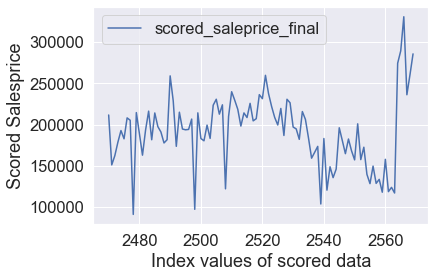

In [126]:
dfsaleprice_inversed = pd.DataFrame(yScaler.inverse_transform(scored_saleprice), columns=['scored_saleprice_final'], index=X_scoreReg_final.index)
line1 = dfsaleprice_inversed.plot()
line1.set_xlabel('Index values of scored data')
line1.set_ylabel('Scored Salesprice')

In [127]:
dfsaleprice_inversed["PID"]=scoreData["PID"]   
dfsaleprice_inversed

,scored_saleprice_final,PID
2470,211588.375920,528445060
2471,151151.789157,528456160
2472,162265.905280,528458070
2473,178629.094407,906380190
2474,192728.953279,906385010
...,...,...
2565,289310.498225,528118040
2566,330619.402937,528166120
2567,236115.754873,528170070
2568,260189.896698,528172080


Finally, save to external driver

In [128]:
dfsaleprice_inversed.to_csv("Property-Scored_Salesprice_final.csv", index=True)

According to our analysis, the top 20 choice properties are as follows:

| PID | Predicted Sale Price|
|-----|:--------------------|
| 528166120	| 324889.6121| 
| 528178070| 	286849.6392| 
| 528118040	| 285097.7984| 
| 528114050| 	275337.5422| 
| 528172080	| 261072.5524| 
| 907254020| 	260321.7634| 
| 534128010| 	259070.4485| 
| 528280180	| 240050.4621| 
| 907254090| 	238298.6212| 
| 907192130| 	236296.5174| 
| 907253110| 	233293.3617| 
| 527325110| 	232292.3097| 
| 528170070| 	230540.4689| 
| 531382120| 	230290.2059| 
| 527183060| 	230039.9429| 
| 534128020| 	229289.154| 
| 527327050| 	226035.7353| 
| 907181140| 	225535.2093| 
| 527183030| 	223032.5795| 
| 907405020| 	223032.5795| 

